# Automatic Ticket Assignment





Problem Statement:

Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service.

Additional effort needed for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service. Guided by powerful AI techniques that can classify incidents to right functional groups can help organizations to reduce the resolving time of the issue and can focus on more productive tasks.

**Objective:**

The objective of the project is,

Learn how to use different classification models.
Use transfer learning to use pre-built models.
Learn to set the optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc.
Read different research papers of given domain to obtain the knowledge of advanced models for the given problem.
This capstone project intends to reduce the manual intervention of IT operations or Service desk teams by automating the ticket assignment process.The goal here is to create a text classification based ML model that can automatically classify any new tickets by analysing ticket description to one of the relevant Assignment groups, which could be later integrated to any ITSM tool like Service Now. Based on the ticket description our model will output the probability of assigning it to one of the 74 Groups.

Data:

Details about the data and dataset files are given in below link, https://drive.google.com/open?id=1OZNJm81JXucV3HmZroMq6qCT2m7ez7IJ

**Steps Involved:**

> **Pre-Processing, Data Visualization and EDA**

*   Exploring the given Data files
*   Understanding the structure of data
*   Missing points in data
*   Finding inconsistencies in the data
*   Visualizing different patterns
*   Visualizing different text features
*   Dealing with missing values
*   Text preprocessing
*   Creating word vocabulary from the corpus of report text data
*   Creating tokens as required

> **Model Building**

*   Building a model architecture which can classify.
*   Trying different model architectures by researching state of the art for similar tasks.
*   Train the model
*   To deal with large training time, save the weights so that you can use them when training the model for the second time without starting from scratch.

> **Test the Model, Fine-tuning and Repeat**

*   Test the model and report as per evaluation metrics
*   Try different models
*   Try different evaluation metrics
*   Set different hyper parameters, by trying different optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc..for these models to fine-tune them
*   Report evaluation metrics for these models along with your observation on how changing different hyper parameters leads to change in the final evaluation metric.

## Import Libraries

In [ ]:
!pip install googletrans
!pip install contractions
!pip install fasttext
!pip install langdetect
!pip install gensim
!pip install bs4
!pip install pyLDAvis
!pip install warnings

     |████████████████████████████████| 61kB 4.2MB/s 
     |████████████████████████████████| 942kB 13.9MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 102kB 8.2MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=be0125bae0a993487d18eac79d7be430afbe9258c88eb166ba9b3a132c778365
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=25f4c7b6b4bb9769c0708a077c68d9dfccc55663ce7c74b0344ce1c7b7b7969a
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars
     |████████████████████████████████| 245kB 8.5MB/s 
     |████████████████████████████████| 31

In [ ]:
# Basic python computation and visualization
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
import scipy.stats as st
from statsmodels.stats.proportion import proportions_ztest

# For handling string
import string
# For performing mathematical operations
import math

# Deep Learning Libraries and models
import keras 
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
import io
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorboard.plugins import projector

# Model building

from time import time
from sklearn import preprocessing
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder 
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from xgboost.sklearn import XGBClassifier
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
import pickle
plt.style.use('ggplot')
%matplotlib inline

# Tools & Evaluation metrics
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report, auc, f1_score
from sklearn.metrics import roc_curve, accuracy_score, precision_recall_curve 
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import RandomOverSampler

# NLP text handling libraries
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk import pos_tag
from string import punctuation
from wordcloud import WordCloud, ImageColorGenerator
import googletrans
from googletrans import Translator
from collections import Counter
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import contractions
import fasttext
from langdetect import detect

# Topic Modeling
import pyLDAvis.sklearn
from textblob import TextBlob
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

# General purpose
import os
from zipfile import ZipFile
from google.colab import drive

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
drive.mount('/content/drive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
project_path = '/content/drive/My Drive/Capstone Project NLP/' 
os.chdir(project_path) 
os.getcwd()

'/content/drive/My Drive/Capstone Project NLP'

## Load and Understand the Data

In [ ]:
## Read the data from EXCEL
incidents = pd.read_excel(project_path + "input_data.xlsx")

## Quick View 
incidents.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,spxjnwir pjlcoqds,GRP_0
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
## basic info
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [ ]:
## Shape
incidents.shape

(8500, 4)

In [ ]:
## List of columns
incidents.columns

Index(['Short description', 'Description', 'Caller', 'Assignment group'], dtype='object')

In [ ]:
## List the unique assignment groups
incidents["Assignment group"].unique()
print("Number of unique assignment groups - ", incidents["Assignment group"].nunique())

Number of unique assignment groups -  74


In [ ]:
## find nulls
incidents[incidents.isna().any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,"\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail.com\r\n\r\nhi,\r\n\r\n\r\n\r\nlink is not working. kindly resolve yhe issue on urgent basis.\r\n\r\n\r\n\r\nbest",ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamviewer.\r\n-help the user login to the portal.\r\n-issue resolved.,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvqgbdhm.fwchqjor@gmail.com\ncustomer number:\ntelephone:-not available\nsummary:can't get into vpn - need to be on at 4:30 est and it wont' happen please help aerp!,wvqgbdhm fwchqjor,GRP_0
4341,NaN,"\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail.com\r\n\r\ngood morning,\r\n\r\nwhen trying to log on to erp i get this error below.\r\nplease help urgently as i can not process customer order.\r\n\r\n[cid:image001.png@01d20f2e.751db880]\r\n\r\n\r\n",eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


**Observation:**

* There are 4 columns and all are string columns.
* There are totally 8500 rows and there seems to be missing values in Short description and Description columns, which needs to be looked into and handled.
* There are 74 unique assignment groups - GRP_0 the most frequent item with 3976 entries.
* Caller columns mainly contains the details of the user who raised the incident and is of not much use in our analysis and can be dropped.
* Assignment group is our predictor / target column with multiple classes.
This is a Multiclass Classification problem.


## Data Cleansing
Following actions were peformed - 
* Remove null columns
* Drop duplicates
* Remove special characters, trailing spaces, numbers
* Convert to lower case

In [ ]:
# drop nulls
incidents.dropna(inplace=True)
incidents.shape

(8491, 4)

In [ ]:
## Duplicates 
sub_incidents = incidents[['Short description', 'Description', 'Caller','Assignment group']].copy()
duplicateRowsDF = sub_incidents[sub_incidents.duplicated()]
duplicateRowsDF

,Short description,Description,Caller,Assignment group
51,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
229,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
493,ticket update on inplant_872730,ticket update on inplant_872730,fumkcsji sarmtlhy,GRP_0
512,blank call //gso,blank call //gso,rbozivdq gmlhrtvp,GRP_0
667,job bkbackup_tool_powder_prod_full failed in job_scheduler at: 10/22/2016 18:33:00,received from: monitoring_tool@company.com\r\n\r\njob bkbackup_tool_powder_prod_full failed in job_scheduler at: 10/22/2016 18:33:00,bpctwhsn kzqsbmtp,GRP_8
...,...,...,...,...
7836,probleme mit erpgui \tmqfjard qzhgdoua,probleme mit erpgui \tmqfjard qzhgdoua,tmqfjard qzhgdoua,GRP_24
8051,issue on pricing in distributor_tool,"we have agreed price with many of the distributors for a given period and skus. this is specified through pricing condition zcnc in erp. in distributor_tool, it is order through sold to & ship to combination.\r\n- till august â€“ flat rate deployment, we did not have any issues.\r\n- today, when the distributor tried to book the order with zcnc pricing condition. the initial screen shows the correct price. but when the item is selected and quick order is clicked on, the price is getting changed to list price less standard discount instead of retaining the zcnc price.",hbmwlprq ilfvyodx,GRP_21
8093,reset passwords for prgthyuulla ramdntythanjesh using password_management_tool password reset.,the,boirqctx bkijgqry,GRP_17
8347,blank call // loud noise,blank call // loud noise,rbozivdq gmlhrtvp,GRP_0


In [ ]:
# Remove Duplicates
incidents_upd = incidents.drop_duplicates(['Short description', 'Description', 'Caller', 'Assignment group'])

In [ ]:
#remove spaces trailing
incidents_upd['Short description'] = incidents_upd['Short description'].str.strip()
incidents_upd['Description'] = incidents_upd['Description'].str.strip()

#remove tabs and carriage returns
incidents_upd.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=[" "," "], regex=True, inplace=True)

# Removing special characters
incidents['Short description']  = incidents['Short description'].map(lambda x: re.sub(r'\W', ' ', x))
incidents['Description'] = incidents['Description'].map(lambda x: re.sub(r'\W', ' ', x))

#Getting rid of numbers & special characters etc

spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    incidents_upd['Short description'] = incidents_upd['Description'].str.replace(char, ' ')
    incidents_upd['Description'] = incidents_upd['Description'].str.replace(char, ' ')

#remove numbers    
incidents_upd['Description'] = incidents_upd['Description'].replace('\d+', '', regex=True)
incidents_upd['Short description'] = incidents_upd['Short description'].replace('\d+', '', regex=True)
    
#remove more than 1 space
incidents_upd.replace('\s+', ' ', regex=True, inplace=True)

#make lower case
incidents_upd.apply(lambda x: x.astype(str).str.lower())

incidents_upd.head(10)

<input>:23: DeprecationWarning: invalid escape sequence \d
<input>:23: DeprecationWarning: invalid escape sequence \d
<input>:23: DeprecationWarning: invalid escape sequence \d
<input>:23: DeprecationWarning: invalid escape sequence \d
<input>:24: DeprecationWarning: invalid escape sequence \d
<input>:23: DeprecationWarning: invalid escape sequence \d
<input>:24: DeprecationWarning: invalid escape sequence \d
<input>:23: DeprecationWarning: invalid escape sequence \d
<input>:24: DeprecationWarning: invalid escape sequence \d
<input>:23: DeprecationWarning: invalid escape sequence \d
<input>:24: DeprecationWarning: invalid escape sequence \d
<input>:23: DeprecationWarning: invalid escape sequence \d
<input>:24: DeprecationWarning: invalid escape sequence \d
<input>:23: DeprecationWarning: invalid escape sequence \d
<input>:24: DeprecationWarning: invalid escape sequence \d
<input>:23: DeprecationWarning: invalid escape sequence \d
<input>:24: DeprecationWarning: invalid escape sequence 

,Short description,Description,Caller,Assignment group
0,verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,spxjnwir pjlcoqds,GRP_0
1,received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,hmjdrvpb komuaywn,GRP_0
2,received from eylqgodm ybqkwiam gmail com hi i cannot log on to vpn best,received from eylqgodm ybqkwiam gmail com hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0
6,event critical HostName company com the value of mountpoint threshold for oracle SID erpdata srpsad srpsad data perpsrpsad is,event critical HostName company com the value of mountpoint threshold for oracle SID erpdata srpsad srpsad data perpsrpsad is,jyoqwxhz clhxsoqy,GRP_1
7,ticket no employment status new non employee enter user s name,ticket no employment status new non employee enter user s name,eqzibjhw ymebpoih,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0
9,ticket update on inplant,ticket update on inplant,fumkcsji sarmtlhy,GRP_0


In [ ]:
incidents.head()

,Short description,Description,Caller,Assignment group
0,login issue,verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,spxjnwir pjlcoqds,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


## Exploratory Data Analysis

### Group by Category

In [ ]:
## Group by Categories
df_grp = incidents.groupby(['Assignment group']).size().reset_index(name='counts')
df_grp

,Assignment group,counts
0,GRP_0,3968
1,GRP_1,31
2,GRP_10,140
3,GRP_11,30
4,GRP_12,257
...,...,...
69,GRP_71,2
70,GRP_72,2
71,GRP_73,1
72,GRP_8,661


In [ ]:
df_grp.describe()

,counts
count,74.000000
mean,114.743243
std,464.840614
min,1.000000
25%,5.250000
50%,26.000000
75%,84.000000
max,3968.000000


### Distribution by group

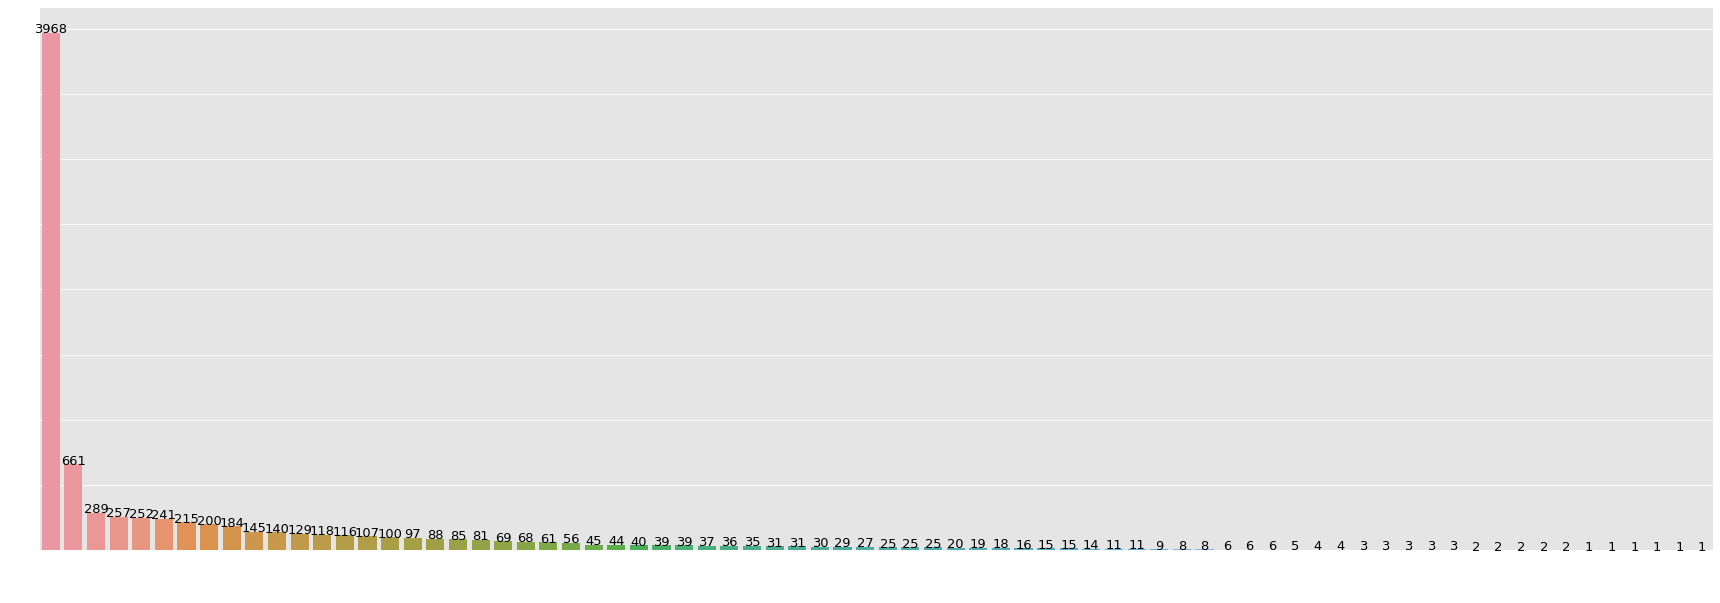

In [ ]:
assgn = incidents['Assignment group'].value_counts()
plt.figure(figsize=(30,10))
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
cntplot = sns.barplot(x=assgn.index,y=assgn.values)
cntplot.set_xticklabels(cntplot.get_xticklabels(), rotation=90, ha="right")
for i in range(len(assgn)):
  cntplot.text(i, assgn.values[i], assgn.values[i], color='black', ha='center', fontsize=13)
plt.show()

**Observation:**

* The Target class distrubtion is extremely skewed
* Large no of entries for GRP_0 (amounting to 3926) which account for ~50% of the data
* GRP_0 and GRP_8 together amount to around 55% of the available data.
* There are groups with 1 entry also. 
* We have to resolve the imbalance before modelling.

### Caller - Assignment group analysis to identify any patterns

In [ ]:
incidents['Caller'].describe()

count                  8491
unique                 2948
top       bpctwhsn kzqsbmtp
freq                    810
Name: Caller, dtype: object

**Observation:**
*   There are 2948 unique callers who have submitted tickets.
*   'bpctwhsn kzqsbmtp' is the most frequent caller with 788 records  

Let us try to explore any relation between the caller and assignment groups.

In [ ]:
incidents_freqgrp = incidents[incidents['Assignment group'].isin(list(incidents['Assignment group'].value_counts()[incidents['Assignment group'].value_counts()>10].index))]
freq_grp = (np.max(pd.crosstab(incidents_freqgrp['Caller'],incidents_freqgrp['Assignment group'])) /
            np.sum(pd.crosstab(incidents_freqgrp['Caller'],incidents_freqgrp['Assignment group']))).sort_values(ascending=False)
grp_df = incidents_freqgrp[incidents_freqgrp['Assignment group'].isin(list(freq_grp[freq_grp>0.4].index))].groupby(by='Assignment group').agg(lambda x:x.value_counts().index[0])
grp_df.loc[freq_grp[freq_grp>0.4].index,'Percentage tickets by most frequent caller'] = freq_grp[freq_grp>0.4].round(3).values
grp_df.loc[freq_grp[freq_grp>0.4].index,'Total records for group'] = incidents[incidents['Assignment group'].isin(list(freq_grp[freq_grp>0.4].index))]['Assignment group'].value_counts()
grp_df.drop(columns=['Short description','Description'])

,Caller,Percentage tickets by most frequent caller,Total records for group
Assignment group,,,
GRP_10,bpctwhsn kzqsbmtp,0.429,140
GRP_41,entuakhp xrnhtdmk,0.550,40
GRP_5,bpctwhsn kzqsbmtp,0.744,129
GRP_6,bpctwhsn kzqsbmtp,0.484,184
GRP_60,bpctwhsn kzqsbmtp,0.800,20
GRP_8,bpctwhsn kzqsbmtp,0.548,661
GRP_9,bpctwhsn kzqsbmtp,0.607,252


**Observation:**

* We have listed the assignment groups where most of the records are submitted by 
single caller.
* 'bpctwhsn kzqsbmtp' is the most frequent caller for groups 5, 6, 8, 9, 10 and 60. 
* There is some correlation between these groups and caller names, but this is not significant enough finding to set as a rule.








In [ ]:
incidents_freqcall = incidents[incidents['Caller'].isin(list(incidents['Caller'].value_counts()[incidents['Caller'].value_counts()>20].index))]
freq_call = (np.max(pd.crosstab(incidents_freqcall['Assignment group'],incidents_freqcall['Caller'])) /
            np.sum(pd.crosstab(incidents_freqcall['Assignment group'],incidents_freqcall['Caller']))).sort_values(ascending=False)
call_df = incidents_freqcall[incidents_freqcall['Caller'].isin(list(freq_call[freq_call>0.7].index))].groupby(by='Caller').agg(lambda x:x.value_counts().index[0])
call_df.loc[freq_call[freq_call>0.7].index,'Percentage tickets by most frequent group'] = freq_call[freq_call>0.7].round(3).values
call_df.loc[freq_call[freq_call>0.7].index,'Total records for caller'] = incidents[incidents['Caller'].isin(list(freq_call[freq_call>0.7].index))]['Caller'].value_counts()
call_df.drop(columns=['Short description','Description'])

,Assignment group,Percentage tickets by most frequent group,Total records for caller
Caller,,,
efbwiadp dicafxhv,GRP_0,1.000,45
entuakhp xrnhtdmk,GRP_41,0.880,25
fumkcsji sarmtlhy,GRP_0,0.985,134
jionmpsf wnkpzcmv,GRP_24,0.958,24
olckhmvx pcqobjnd,GRP_0,1.000,54
rbozivdq gmlhrtvp,GRP_0,0.989,87
vzqomdgt jwoqbuml,GRP_24,0.708,24


**Observation:**

*   We have plotted the caller based analysis where most of the records submitted by the caller are to a single group.
* All the records from callers 'efbwiadp dicafxhv' and 'olckhmvx pcqobjnd' are assigned to group 0. Again, we can't consider this significant because group 0 records account for half of all input data.
* Consider the volume of total records, we conclude there is no significant correlation between caller and assignment group.



### Short description length analysis and its relation with Assignment group

In [ ]:
incidents['sdesc_len'] = incidents['Short description'].str.len()

Text(0.5, 1.0, 'Distribution of length of short descriptions')

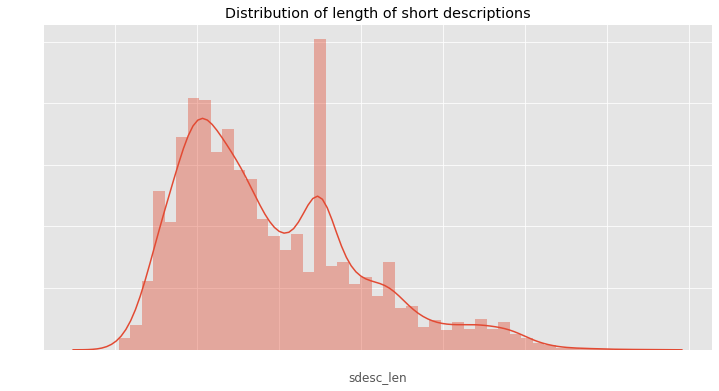

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(incidents['sdesc_len']).set_title('Distribution of length of short descriptions')

**Observation:**

Above plot shows the distribution of short description lengths.
We observe two peaks - most of the records are 20-30 words long but there is also a peak around 60. There is a possibility that this peak maybe characteristic of particular groups. Let us look at the groupwise analysis.

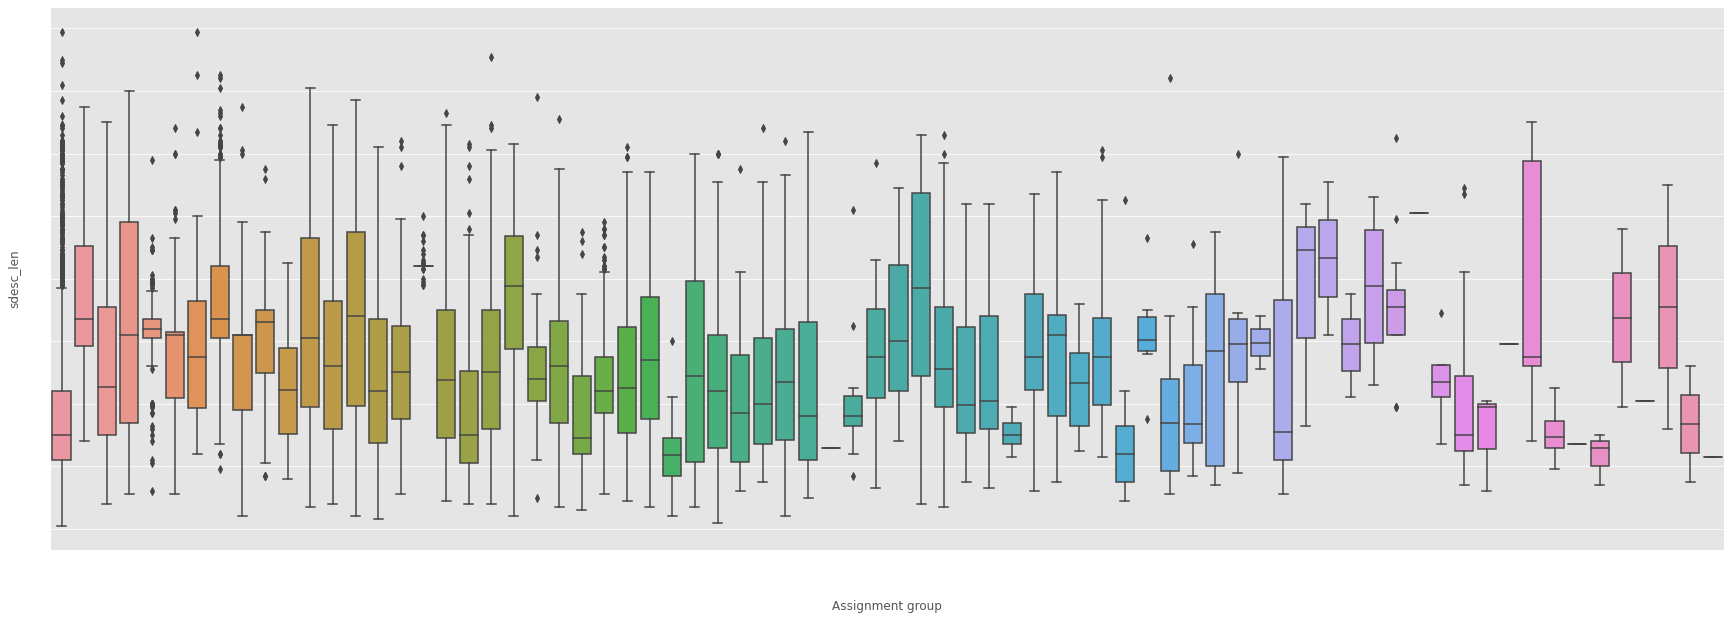

In [ ]:
plt.figure(figsize=(30,10))
lengths = sns.boxplot(data=incidents, x='Assignment group', y='sdesc_len')
lengths.set_xticklabels(lengths.get_xticklabels(),rotation=90)
plt.show()

**Observation:**

We can see most of the short description are around 30 to 80 characters long with mean length around 50. However, we can see data for certain groups are on the upper range (GRP_20, GRP_1, GRP_56), while some have a characteristic to have lower lengths (GRP_0, GRP_48, GRP_19).

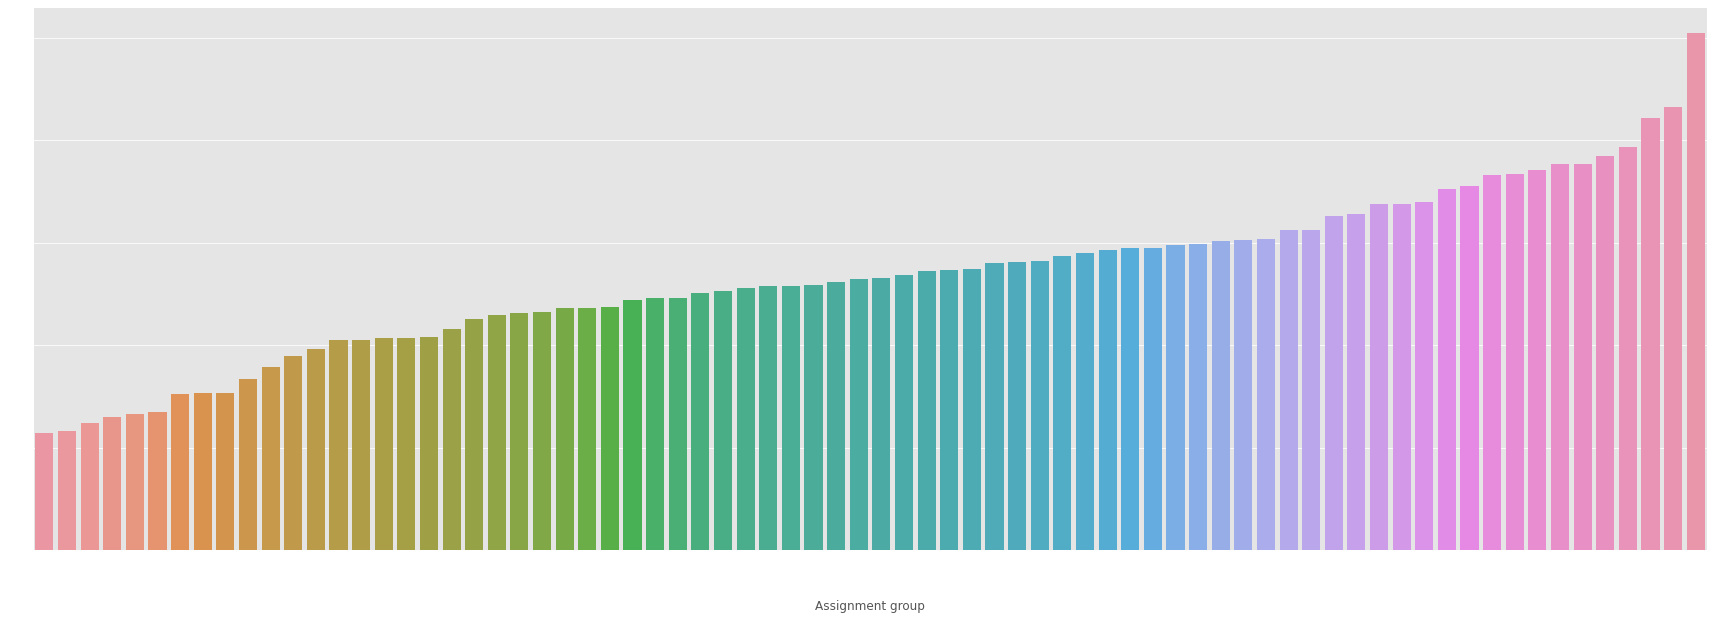

In [ ]:
plt.figure(figsize=(30,10))
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plot_meansdesc_len=sns.barplot(x=incidents.groupby(['Assignment group']).mean()['sdesc_len'].sort_values().index,
                               y=incidents.groupby(['Assignment group']).mean()['sdesc_len'].sort_values().values)
plot_meansdesc_len.set_xticklabels(plot_meansdesc_len.get_xticklabels(),rotation=90)
plt.show()

**Observation:**

We are seeing a pattern with records for groups 17, 57 and 61 typically having longer mean word lengths in contrast to most other groups having lengths below 60 words.


### Description length analysis and its relation with assignment group

In [ ]:
incidents['desc_len'] = incidents['Description'].str.len()

Text(0.5, 1.0, 'Distribution of length of descriptions')

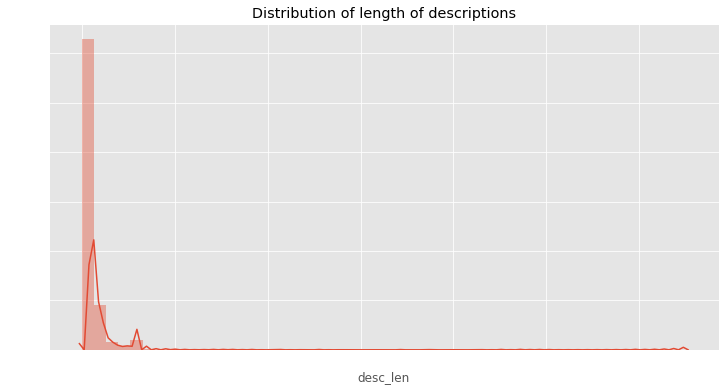

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(incidents['desc_len']).set_title('Distribution of length of descriptions')

**Observation:**

The distribution of description lengths is extremely skewed, let us try to omit the tail and focus the major portion from the right skewed graph.

In [ ]:
incidents['desc_len'].describe(percentiles=[0.25,0.5,0.75,0.9,0.95])

count     8491.000000
mean       204.081734
std        519.941622
min          1.000000
25%         41.000000
50%        106.000000
75%        201.000000
90%        395.000000
95%        676.500000
max      13001.000000
Name: desc_len, dtype: float64

In [ ]:
len(incidents[incidents['desc_len'] > 680])

421

**Observation:**

* Half of the records have less than 100 words.
* 90% of descriptions have less than 400 words.
* The remaining 10% records are very long and extremely skewed in comparison with the remaining portion.

Let us consider till the 95th percentile for further visualization.

Text(0.5, 1.0, 'Distribution of length of descriptions')

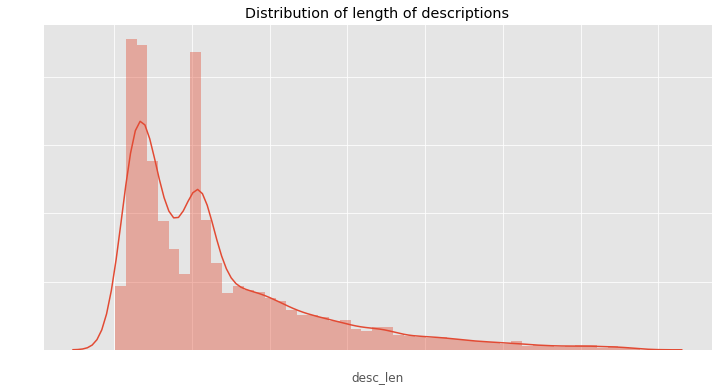

In [ ]:
incidents_95 = incidents[incidents['desc_len'] < incidents['desc_len'].quantile(0.95)]
plt.figure(figsize=(12,6))
sns.distplot(incidents_95['desc_len']).set_title('Distribution of length of descriptions')

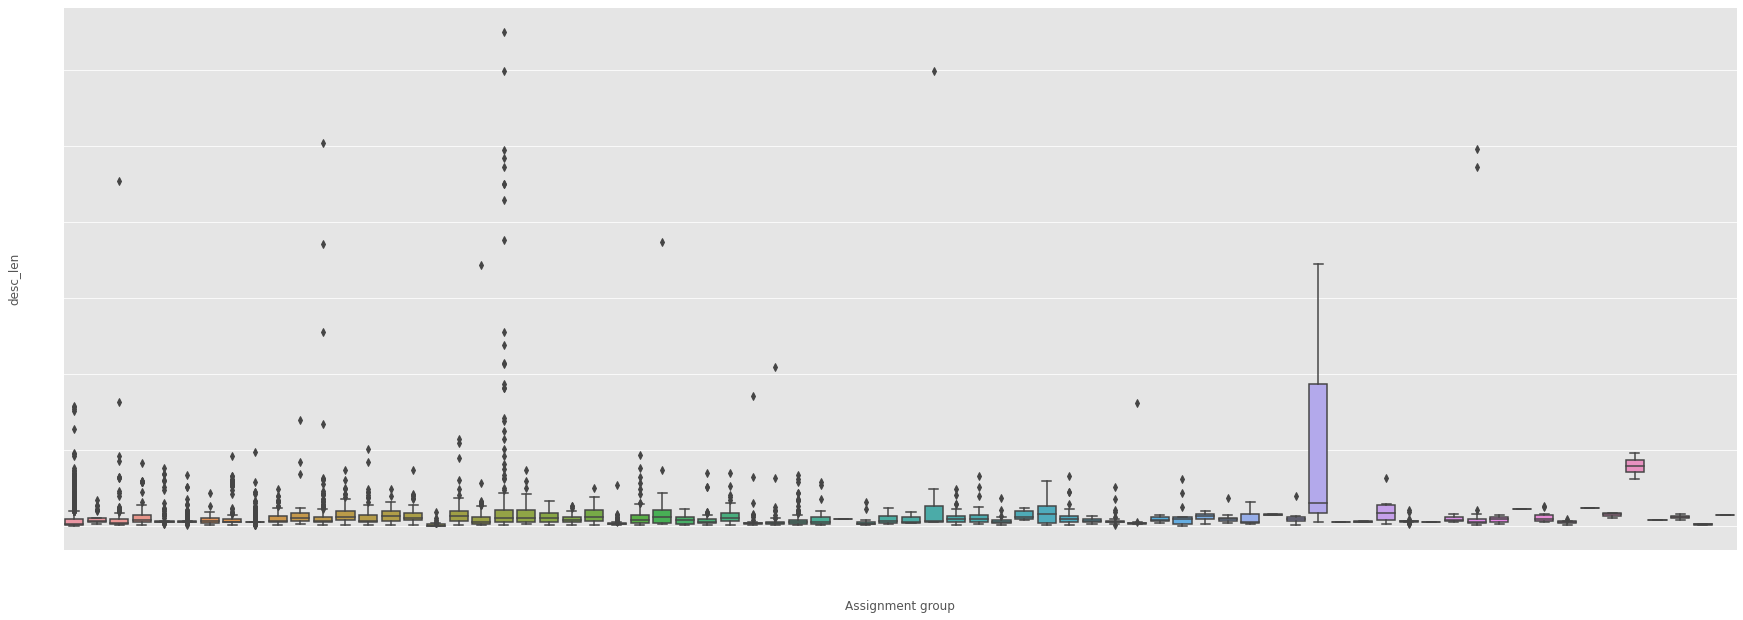

In [ ]:
plt.figure(figsize=(30,10))
lengths = sns.boxplot(data=incidents, x='Assignment group', y='desc_len')
lengths.set_xticklabels(lengths.get_xticklabels(),rotation=90)
plt.show()

**Observation:**

From the above graph, most of the group 56 records have long descriptions.
Let us bring the focus to records which have limited length. 


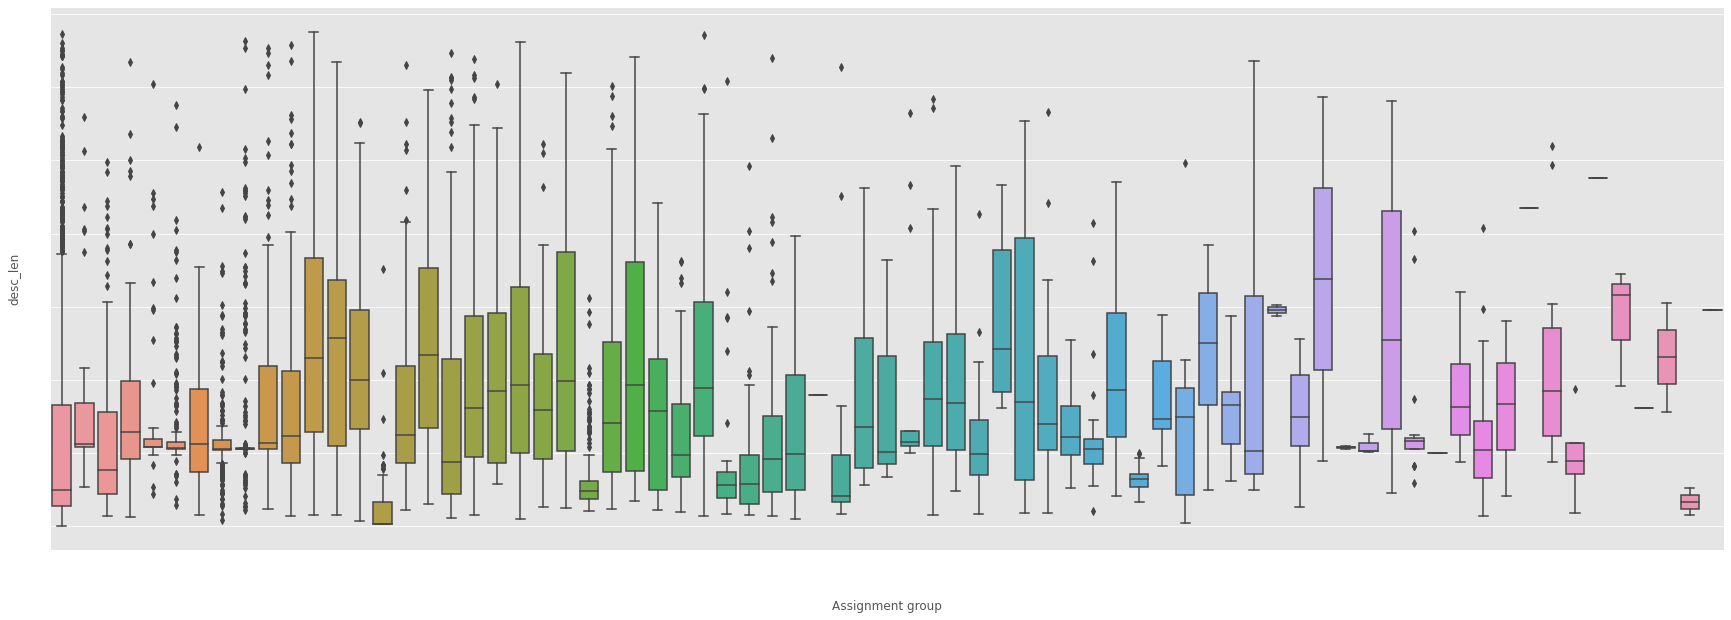

In [ ]:
plt.figure(figsize=(30,10))
lengths = sns.boxplot(data=incidents_95, x='Assignment group', y='desc_len')
lengths.set_xticklabels(lengths.get_xticklabels(),rotation=90)
plt.show()

**Observation:**

There is no clear pattern visible to describe the relation between group and description lengths. It is however visible that for most of the groups, there are less outliers and some groups fall in the lower range while most of them have lengths in the range of 100 to 350.

### Mean length of Description Columns

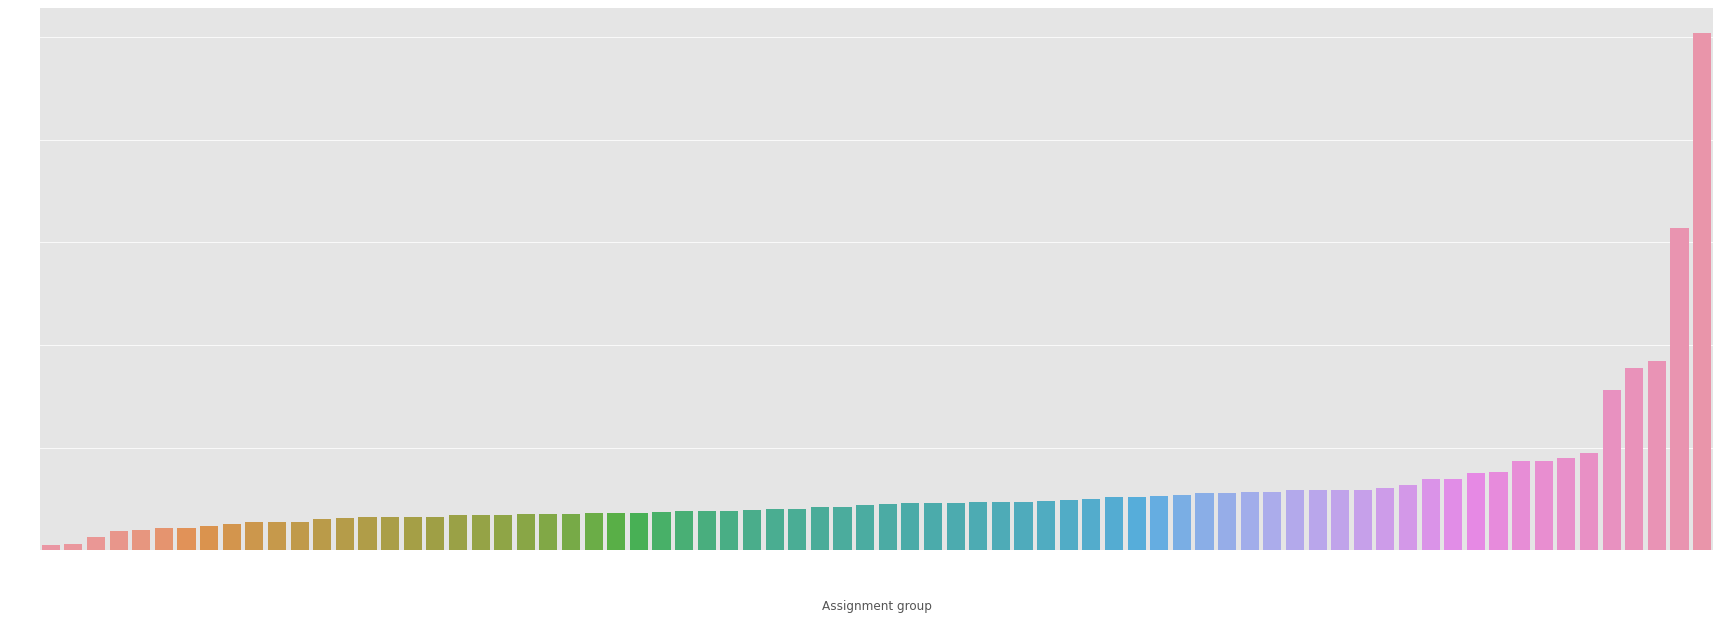

In [ ]:
plt.figure(figsize=(30,10))
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plot_meandesc_len=sns.barplot(x=incidents.groupby(['Assignment group']).mean()['desc_len'].sort_values().index,
                               y=incidents.groupby(['Assignment group']).mean()['desc_len'].sort_values().values)
plot_meandesc_len.set_xticklabels(plot_meandesc_len.get_xticklabels(),rotation=90)
plt.show()

**Observation:**

There is a clear distinction between the data of five groups which have very long description data. Other group records have mean length lesser than 500 words.

In [ ]:
#Check if short description is present in Description field, else merge both the fields into Description field
incidents['isSubstr'] = incidents.apply(lambda x: x['Short description'] not in x['Description'], axis=1)
incidents.loc[incidents['isSubstr']==True, 'Description'] = incidents['Short description'] + ' ' + incidents['Description']

In [ ]:
incidents.drop(columns=['Short description','sdesc_len','desc_len','isSubstr'],inplace=True)
incidents.head()

,Description,Caller,Assignment group
0,login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,spxjnwir pjlcoqds,GRP_0
1,received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn received from eylqgodm ybqkwiam gmail com hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,owlgqjme qhcozdfx,GRP_0


### Get the Frequency of Words in the Description Column

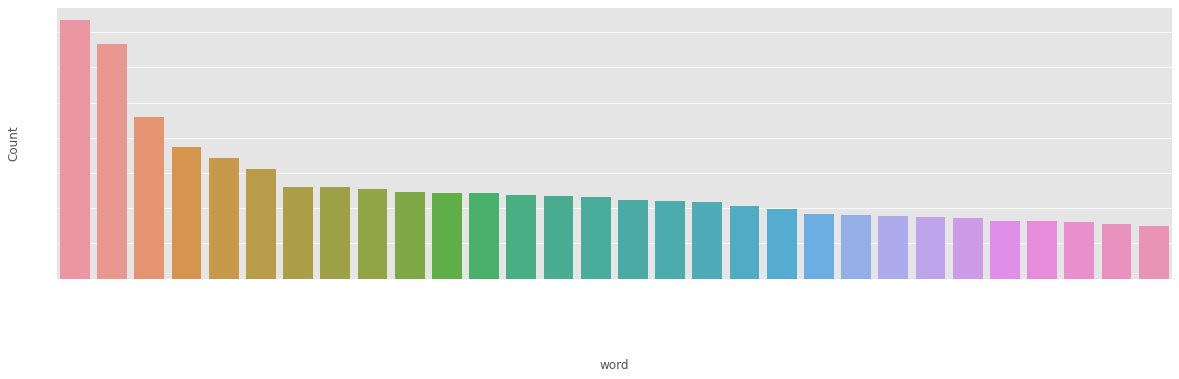

In [ ]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top n most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  plt.rcParams['xtick.color'] = 'white'
  plt.rcParams['ytick.color'] = 'white'
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
  plt.show()

freq_words(list(incidents['Description']))

#### Generate a wordcloud for the Description column 

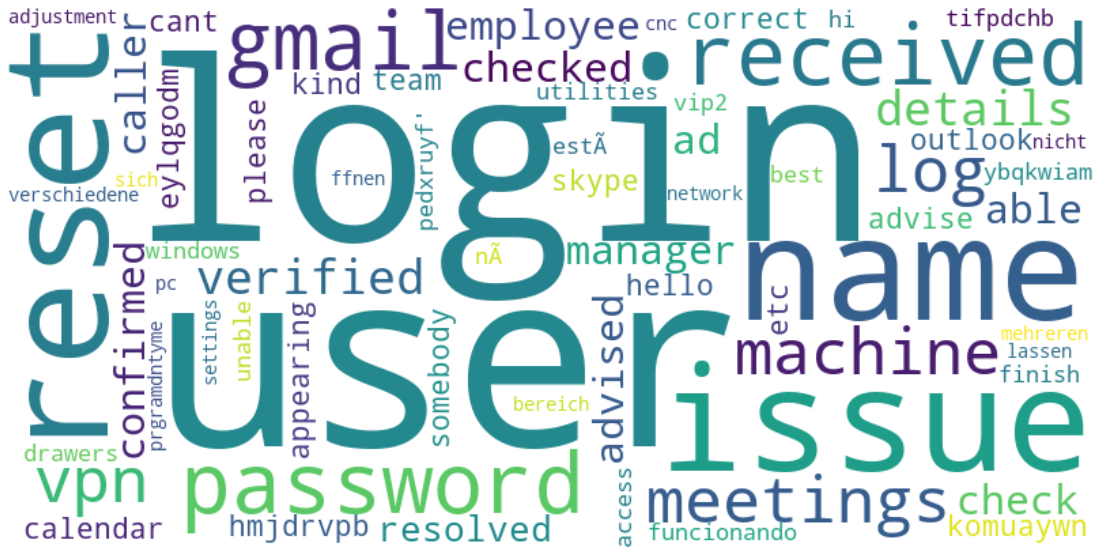

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#word cloud for overall data
stopwords = STOPWORDS

wordcloud = WordCloud(stopwords = stopwords, max_words=500, background_color="white",width=800, height=400).generate(str(incidents['Description'].values))

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

**Observation:** 

The word cloud shows the top reasons for raising a ticket but it needs to be pre-processed so that we can identify any patterns.

## Text Pre-processing

#### Get the frequency of words in Description Column

In [ ]:
# function to plot most frequent terms. This is used to gauge the quality of text processing
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top n most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

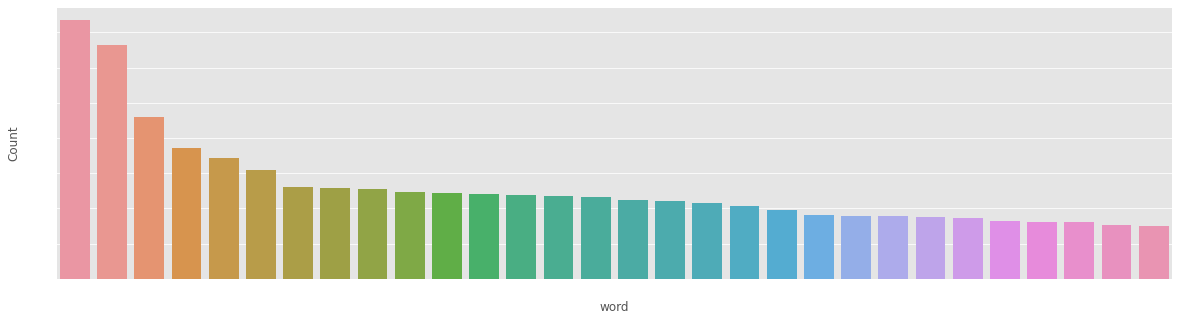

In [ ]:
freq_words(list(incidents['Description']))

**Observation:**

The above plot shows most frequent words in the dataset.
We can see that most of the words are common English words (known as 'stopwords') and doesn't contribute to any inference. We can only try to do inference after we remove stopwords.

#### Expand the contractions

In [ ]:
incidents_upd_combined = incidents.copy()

In [ ]:
incidents['Description_Expanded'] = incidents['Description'].apply(lambda x: [contractions.fix(word) for word in x.split()])

#Convert the expanded column to string
incidents['Description_Expanded_Str'] = [' '.join(map(str, l)) for l in incidents['Description_Expanded']]
incidents.head()

,Description,Caller,Assignment group,Description_Expanded,Description_Expanded_Str
0,login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,spxjnwir pjlcoqds,GRP_0,"[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]",login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved
1,received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,hmjdrvpb komuaywn,GRP_0,"[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]",received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind
2,cant log in to vpn received from eylqgodm ybqkwiam gmail com hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,"[can not, log, in, to, vpn, received, from, eylqgodm, ybqkwiam, gmail, com, hi, i, cannot, log, on, to, vpn, best]",can not log in to vpn received from eylqgodm ybqkwiam gmail com hi i cannot log on to vpn best
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,"[unable, to, access, hr_tool, page]",unable to access hr_tool page
4,skype error,owlgqjme qhcozdfx,GRP_0,"[skype, error]",skype error


#### English Language Detection

In [ ]:
pretrained_model = project_path + "lid.176.bin" 
model = fasttext.load_model(pretrained_model)
langs = []
for sent in incidents['Description_Expanded_Str']:
    lang = model.predict(sent)[0]
    langs.append(str(lang)[11:13])
incidents['langs'] = langs

incidents.head(10)

,Description,Caller,Assignment group,Description_Expanded,Description_Expanded_Str,langs
0,login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,spxjnwir pjlcoqds,GRP_0,"[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]",login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,en
1,received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,hmjdrvpb komuaywn,GRP_0,"[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]",received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,en
2,cant log in to vpn received from eylqgodm ybqkwiam gmail com hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,"[can not, log, in, to, vpn, received, from, eylqgodm, ybqkwiam, gmail, com, hi, i, cannot, log, on, to, vpn, best]",can not log in to vpn received from eylqgodm ybqkwiam gmail com hi i cannot log on to vpn best,en
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,"[unable, to, access, hr_tool, page]",unable to access hr_tool page,en
4,skype error,owlgqjme qhcozdfx,GRP_0,"[skype, error]",skype error,ja
5,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,"[unable, to, log, in, to, engineering, tool, and, skype]",unable to log in to engineering tool and skype,en
6,event critical HostName_221 company com the value of mountpoint threshold for oracle SID_37 erpdata21 event critical HostName_221 company com the value of mountpoint threshold for oracle SID_37 erpdata21 sr3psa1d_7 sr3psa1d data7 perpsr3psa1d 4524 is 98,jyoqwxhz clhxsoqy,GRP_1,"[event, critical, HostName_221, company, com, the, value, of, mountpoint, threshold, for, oracle, SID_37, erpdata21, event, critical, HostName_221, company, com, the, value, of, mountpoint, threshold, for, oracle, SID_37, erpdata21, sr3psa1d_7, sr3psa1d, data7, perpsr3psa1d, 4524, is, 98]",event critical HostName_221 company com the value of mountpoint threshold for oracle SID_37 erpdata21 event critical HostName_221 company com the value of mountpoint threshold for oracle SID_37 erpdata21 sr3psa1d_7 sr3psa1d data7 perpsr3psa1d 4524 is 98,en
7,ticket_no1550391 employment status new non employee enter user s name,eqzibjhw ymebpoih,GRP_0,"[ticket_no1550391, employment, status, new, non, employee, enter, user, s, name]",ticket_no1550391 employment status new non employee enter user s name,en
8,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,"[unable, to, disable, add, ins, on, outlook]",unable to disable add ins on outlook,en
9,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0,"[ticket, update, on, inplant_874773]",ticket update on inplant_874773,en


#### Plot the language Distribution

In [ ]:
#checking detected languages
x=incidents['langs'].value_counts()

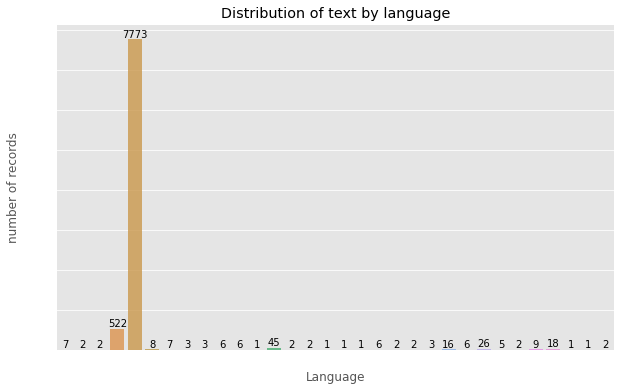

In [ ]:
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

**Observation:**

The plot shows that there is sizeable amount of German (de) text in many records (~500) apart from English. It is of importance to gain knowledge from this records so we will proceed with translate.

#### Translate non-English details

In [ ]:
translator = Translator()

desc_trans=[]

for sentence in incidents['Description_Expanded_Str']:
  try:
    trans = translator.translate(sentence).text if language != 'en' else sentence
  except:
    language = "error"
    print("This row throws an error:", sentence)
  desc_trans.append(trans)

incidents_upd_en = incidents.copy()
incidents['Translated_Description']=desc_trans
print(incidents)


                                                                                                                                                                                                                     Description  ...                                                                                                                                                                                    Translated_Description
0     login issue  verified user details  employee    manager name    checked the user name in ad and reset the password    advised the user to login and check    caller confirmed that he was able to login    issue resolved   ...  login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved
1                                 received from  hmjdrvpb komuaywn gmail com    hello team     my meetings skype meetings etc are not ap

#### Tokenization

In [ ]:
# Package needed for tokenization
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
incidents['tokenized'] = incidents['Translated_Description'].apply(word_tokenize)
incidents.head()

,Description,Caller,Assignment group,Description_Expanded,Description_Expanded_Str,langs,Translated_Description,tokenized
0,login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,spxjnwir pjlcoqds,GRP_0,"[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]",login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,en,login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,"[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]"
1,received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,hmjdrvpb komuaywn,GRP_0,"[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]",received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,en,received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,"[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]"
2,cant log in to vpn received from eylqgodm ybqkwiam gmail com hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,"[can not, log, in, to, vpn, received, from, eylqgodm, ybqkwiam, gmail, com, hi, i, cannot, log, on, to, vpn, best]",can not log in to vpn received from eylqgodm ybqkwiam gmail com hi i cannot log on to vpn best,en,can not log in to vpn received from eylqgodm ybqkwiam gmail com hi i cannot log on to vpn best,"[can, not, log, in, to, vpn, received, from, eylqgodm, ybqkwiam, gmail, com, hi, i, can, not, log, on, to, vpn, best]"
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,"[unable, to, access, hr_tool, page]",unable to access hr_tool page,en,unable to access hr_tool page,"[unable, to, access, hr_tool, page]"
4,skype error,owlgqjme qhcozdfx,GRP_0,"[skype, error]",skype error,ja,skype error,"[skype, error]"


#### Converting all Characters to Lowercase

In [ ]:
incidents['lower'] = incidents['tokenized'].apply(lambda x: [word.lower() for word in x])
incidents.head()

,Description,Caller,Assignment group,Description_Expanded,Description_Expanded_Str,langs,Translated_Description,tokenized,lower
0,login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,spxjnwir pjlcoqds,GRP_0,"[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]",login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,en,login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,"[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]","[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]"
1,received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,hmjdrvpb komuaywn,GRP_0,"[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]",received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,en,received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,"[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]","[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]"
2,cant log in to vpn received from eylqgodm ybqkwiam gmail com hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,"[can not, log, in, to, vpn, received, from, eylqgodm, ybqkwiam, gmail, com, hi, i, cannot, log, on, to, vpn, best]",can not log in to vpn received from eylqgodm ybqkwiam gmail com hi i cannot log on to vpn best,en,can not log in to vpn received from eylqgodm ybqkwiam gmail com hi i cannot log on to vpn best,"[can, not, log, in, to, vpn, received, from, eylqgodm, ybqkwiam, gmail, com, hi, i, can, not, log, on, to, vpn, best]","[can, not, log, in, to, vpn, received, from, eylqgodm, ybqkwiam, gmail, com, hi, i, can, not, log, on, to, vpn, best]"
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,"[unable, to, access, hr_tool, page]",unable to access hr_tool page,en,unable to access hr_tool page,"[unable, to, access, hr_tool, page]","[unable, to, access, hr_tool, page]"
4,skype error,owlgqjme qhcozdfx,GRP_0,"[skype, error]",skype error,ja,skype error,"[skype, error]","[skype, error]"


#### Removing Punctuations

In [ ]:
punc = string.punctuation
incidents['no_punc'] = incidents['lower'].apply(lambda x: [word for word in x if word not in punc])
incidents.head()

,Description,Caller,Assignment group,Description_Expanded,Description_Expanded_Str,langs,Translated_Description,tokenized,lower,no_punc
0,login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,spxjnwir pjlcoqds,GRP_0,"[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]",login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,en,login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,"[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]","[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]","[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]"
1,received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,hmjdrvpb komuaywn,GRP_0,"[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]",received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,en,received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,"[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]","[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]","[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]"
2,cant log in to vpn received from eylqgodm ybqkwiam gmail com hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,"[can not, log, in, to, vpn, received, from, eylqgodm, ybqkwiam, gmail, com, hi, i, cannot, log, on, to, vpn, best]",can not log in to vpn received from eylqgodm ybqkwiam gmail com hi i cannot log on to vpn best,en,can not log in to vpn received from eylqgodm ybqkwiam gmail com hi i cannot log on to vpn best,"[can, not, log, in, to, vpn, received, from, eylqgodm, ybqkwiam, gmail, com, hi, i, can, not, log, on, to, vpn, best]","[can, not, log, in, to, vpn, received, from, eylqgodm, ybqkwiam, gmail, com, hi, i, can, not, log, on, to, vpn, best]","[can, not, log, in, to, vpn, received, from, eylqgodm, ybqkwiam, gmail, com, hi, i, can, not, log, on, to, vpn, best]"
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,"[unable, to, access, hr_tool, page]

#### Removing Stopwords

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = set(stopwords.words('english'))
incidents['stopwords_removed'] = incidents['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
incidents.head()

,Description,Caller,Assignment group,Description_Expanded,Description_Expanded_Str,langs,Translated_Description,tokenized,lower,no_punc,stopwords_removed
0,login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,spxjnwir pjlcoqds,GRP_0,"[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]",login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,en,login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,"[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]","[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]","[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]","[login, issue, verified, user, details, employee, manager, name, checked, user, name, ad, reset, password, advised, user, login, check, caller, confirmed, able, login, issue, resolved]"
1,received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,hmjdrvpb komuaywn,GRP_0,"[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]",received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,en,received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,"[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]","[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]","[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]","[received, hmjdrvpb, komuaywn, gmail, com, hello, team, meetings, skype, meetings, etc, appearing, outlook, calendar, somebody, please, advise, correct, kind]"
2,cant log in to vpn received from eylqgodm ybqkwiam gmail com hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,"[can not, log, in, to, vpn, received, from, eylqgodm, ybqkwiam, gmail, com, hi, i, cannot, log, on, to, vpn, best]",can not log in to vpn received from eylqgodm ybqkwiam gmail com hi i cannot log on to vpn best,en,can not log in to vpn received from eylqgodm ybqkwiam gmail com hi i cannot log on to vpn best,"[can, not, log, in, to, vpn, received, from, eylqgodm, ybqkwiam, gmail, com, hi, i, c

#### Lemmatization

The idea of stemming is to reduce different forms of word usage into its root word. For example, “drive”, “drove”, “driving”, “driven”, “driver” are derivatives of the word “drive” and very often researchers want to remove this variability from their corpus. Compared to lemmatization, stemming is certainly the less complicated method but it often does not produce a dictionary-specific morphological root of the word. In other words, stemming the word “pies” will often produce a root of “pi” whereas lemmatization will find the morphological root of “pie”.
Instead of taking the easy way out with stemming, let’s apply lemmatization to our data but it requires some additional steps compared to stemming.
1. First, we have to apply parts of speech tags, in other words, determine the part of speech (ie. noun, verb, adverb, etc.) for each word. 
2. We are going to be using NLTK’s word lemmatizer which needs the parts of speech tags to be converted to wordnet’s format. We’ll write a function which make the proper conversion and then use the function within a list comprehension to apply the conversion. 
3. Finally, we apply NLTK’s word lemmatizer.

##### First step is part of speech tagging

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
incidents['pos_tags'] = incidents['stopwords_removed'].apply(nltk.tag.pos_tag)
incidents.head()

,Description,Caller,Assignment group,Description_Expanded,Description_Expanded_Str,langs,Translated_Description,tokenized,lower,no_punc,stopwords_removed,pos_tags
0,login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,spxjnwir pjlcoqds,GRP_0,"[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]",login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,en,login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,"[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]","[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]","[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]","[login, issue, verified, user, details, employee, manager, name, checked, user, name, ad, reset, password, advised, user, login, check, caller, confirmed, able, login, issue, resolved]","[(login, JJ), (issue, NN), (verified, VBD), (user, JJR), (details, NNS), (employee, NN), (manager, NN), (name, NN), (checked, VBD), (user, JJ), (name, NN), (ad, NN), (reset, NN), (password, NN), (advised, VBD), (user, JJ), (login, NN), (check, VB), (caller, NN), (confirmed, VBN), (able, JJ), (login, NN), (issue, NN), (resolved, VBD)]"
1,received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,hmjdrvpb komuaywn,GRP_0,"[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]",received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,en,received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,"[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]","[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]","[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]","[received, hmjdrvpb, komuaywn, gmail, com, hello, team, meetings, skype, meetings, etc, appearing, outlook, calendar, somebody, please, advise, correct, kind]","[(received, VBN), (hmjdrvpb, JJ), (komuaywn, NNS), (gmail, VBP), (com, NN), (hello, NN), (team, NN), (meetings, NNS), (skype, JJ), (meetings, NNS), (etc, VBP), (appea

##### Convert to wordnet

In [ ]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
incidents['wordnet_pos'] = incidents['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
incidents.head()

,Description,Caller,Assignment group,Description_Expanded,Description_Expanded_Str,langs,Translated_Description,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos
0,login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,spxjnwir pjlcoqds,GRP_0,"[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]",login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,en,login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,"[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]","[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]","[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]","[login, issue, verified, user, details, employee, manager, name, checked, user, name, ad, reset, password, advised, user, login, check, caller, confirmed, able, login, issue, resolved]","[(login, JJ), (issue, NN), (verified, VBD), (user, JJR), (details, NNS), (employee, NN), (manager, NN), (name, NN), (checked, VBD), (user, JJ), (name, NN), (ad, NN), (reset, NN), (password, NN), (advised, VBD), (user, JJ), (login, NN), (check, VB), (caller, NN), (confirmed, VBN), (able, JJ), (login, NN), (issue, NN), (resolved, VBD)]","[(login, a), (issue, n), (verified, v), (user, a), (details, n), (employee, n), (manager, n), (name, n), (checked, v), (user, a), (name, n), (ad, n), (reset, n), (password, n), (advised, v), (user, a), (login, n), (check, v), (caller, n), (confirmed, v), (able, a), (login, n), (issue, n), (resolved, v)]"
1,received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,hmjdrvpb komuaywn,GRP_0,"[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]",received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,en,received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,"[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]","[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]","[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]","[receive

##### Apply NLTK's word lemmatizer

In [ ]:
wnl = WordNetLemmatizer()
incidents['lemmatized'] = incidents['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
incidents.head()

,Description,Caller,Assignment group,Description_Expanded,Description_Expanded_Str,langs,Translated_Description,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,spxjnwir pjlcoqds,GRP_0,"[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]",login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,en,login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,"[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]","[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]","[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]","[login, issue, verified, user, details, employee, manager, name, checked, user, name, ad, reset, password, advised, user, login, check, caller, confirmed, able, login, issue, resolved]","[(login, JJ), (issue, NN), (verified, VBD), (user, JJR), (details, NNS), (employee, NN), (manager, NN), (name, NN), (checked, VBD), (user, JJ), (name, NN), (ad, NN), (reset, NN), (password, NN), (advised, VBD), (user, JJ), (login, NN), (check, VB), (caller, NN), (confirmed, VBN), (able, JJ), (login, NN), (issue, NN), (resolved, VBD)]","[(login, a), (issue, n), (verified, v), (user, a), (details, n), (employee, n), (manager, n), (name, n), (checked, v), (user, a), (name, n), (ad, n), (reset, n), (password, n), (advised, v), (user, a), (login, n), (check, v), (caller, n), (confirmed, v), (able, a), (login, n), (issue, n), (resolved, v)]","[login, issue, verify, user, detail, employee, manager, name, check, user, name, ad, reset, password, advise, user, login, check, caller, confirm, able, login, issue, resolve]"
1,received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,hmjdrvpb komuaywn,GRP_0,"[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]",received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,en,received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,"[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]","[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]","[received, from, hmjdrvpb, k

In [ ]:
incidents['lemma_str'] = [' '.join(map(str,l)) for l in incidents['lemmatized']]
incidents.head()

,Description,Caller,Assignment group,Description_Expanded,Description_Expanded_Str,langs,Translated_Description,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str
0,login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,spxjnwir pjlcoqds,GRP_0,"[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]",login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,en,login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,"[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]","[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]","[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]","[login, issue, verified, user, details, employee, manager, name, checked, user, name, ad, reset, password, advised, user, login, check, caller, confirmed, able, login, issue, resolved]","[(login, JJ), (issue, NN), (verified, VBD), (user, JJR), (details, NNS), (employee, NN), (manager, NN), (name, NN), (checked, VBD), (user, JJ), (name, NN), (ad, NN), (reset, NN), (password, NN), (advised, VBD), (user, JJ), (login, NN), (check, VB), (caller, NN), (confirmed, VBN), (able, JJ), (login, NN), (issue, NN), (resolved, VBD)]","[(login, a), (issue, n), (verified, v), (user, a), (details, n), (employee, n), (manager, n), (name, n), (checked, v), (user, a), (name, n), (ad, n), (reset, n), (password, n), (advised, v), (user, a), (login, n), (check, v), (caller, n), (confirmed, v), (able, a), (login, n), (issue, n), (resolved, v)]","[login, issue, verify, user, detail, employee, manager, name, check, user, name, ad, reset, password, advise, user, login, check, caller, confirm, able, login, issue, resolve]",login issue verify user detail employee manager name check user name ad reset password advise user login check caller confirm able login issue resolve
1,received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,hmjdrvpb komuaywn,GRP_0,"[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]",received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,en,received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,"[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]","[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, 

##### Create 2 new attributes - length and word count of the lemmatized description field

In [ ]:
 
incidents['desc_len'] = incidents['lemma_str'].astype(str).apply(len)
incidents['desc_word_cnt'] = incidents['lemma_str'].apply(lambda x: len(str(x).split()))

incidents.head()

,Description,Caller,Assignment group,Description_Expanded,Description_Expanded_Str,langs,Translated_Description,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,desc_len,desc_word_cnt
0,login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,spxjnwir pjlcoqds,GRP_0,"[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]",login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,en,login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,"[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]","[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]","[login, issue, verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset, the, password, advised, the, user, to, login, and, check, caller, confirmed, that, he, was, able, to, login, issue, resolved]","[login, issue, verified, user, details, employee, manager, name, checked, user, name, ad, reset, password, advised, user, login, check, caller, confirmed, able, login, issue, resolved]","[(login, JJ), (issue, NN), (verified, VBD), (user, JJR), (details, NNS), (employee, NN), (manager, NN), (name, NN), (checked, VBD), (user, JJ), (name, NN), (ad, NN), (reset, NN), (password, NN), (advised, VBD), (user, JJ), (login, NN), (check, VB), (caller, NN), (confirmed, VBN), (able, JJ), (login, NN), (issue, NN), (resolved, VBD)]","[(login, a), (issue, n), (verified, v), (user, a), (details, n), (employee, n), (manager, n), (name, n), (checked, v), (user, a), (name, n), (ad, n), (reset, n), (password, n), (advised, v), (user, a), (login, n), (check, v), (caller, n), (confirmed, v), (able, a), (login, n), (issue, n), (resolved, v)]","[login, issue, verify, user, detail, employee, manager, name, check, user, name, ad, reset, password, advise, user, login, check, caller, confirm, able, login, issue, resolve]",login issue verify user detail employee manager name check user name ad reset password advise user login check caller confirm able login issue resolve,150,24
1,received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,hmjdrvpb komuaywn,GRP_0,"[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]",received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,en,received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,"[received, from, hmjdrvpb, komuaywn, gmail, com, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, outlook, calendar, can, somebody, please, advise, how, to, correct, this, kind]","[received, from, hmjdrvpb, komuaywn, gmail, co

### Plot the document frequency of the Description Field

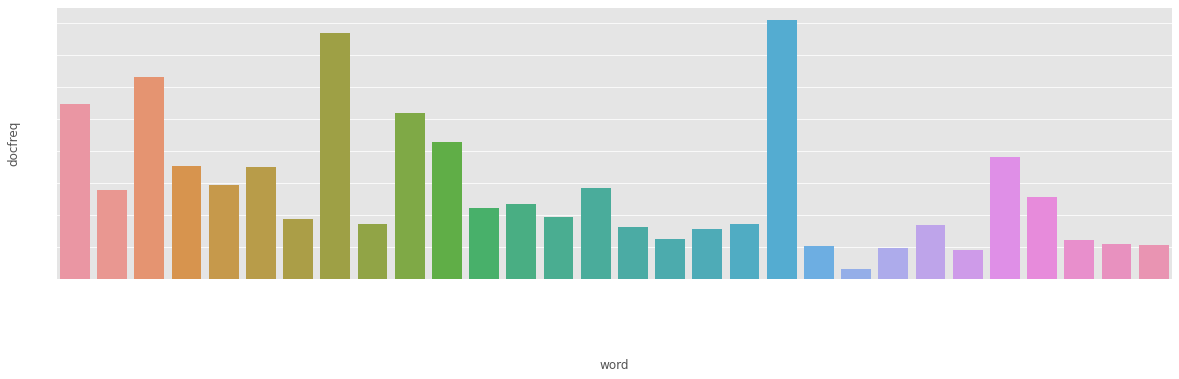

In [ ]:
def docfreq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  d = words_df.nlargest(columns="count", n = terms)
  d['docfreq'] = [incidents.Description.str.contains(i).sum() for i in d['word']]
  plt.figure(figsize=(20,5))
  plt.rcParams['xtick.color'] = 'white'
  plt.rcParams['ytick.color'] = 'white'
  ax = sns.barplot(data=d, x= "word", y = "docfreq")
  ax.set(ylabel = 'docfreq')
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
  plt.show()


docfreq_words(list(incidents['Description']))

**Observation:**

The motive behind plotting the frequency of words is to check whether they add value to our prediction data. None of the words have a document frequency that qualify it to be omitted as a stop word from the dataset, so we will proceed further.

## Exploratory Data Analysis on pre-processed Data

In [ ]:
df_incidents = incidents.copy()
df_incidents.rename(columns = {'lemma_str':'Summary'}, inplace = True)
incidents.rename(columns = {'lemma_str':'tokens'}, inplace = True)
incidents.drop([['Description_Expanded','Description_Expanded_Str','langs','Translated_Description','tokenized',
                   'lower','no_punc','stopwords_removed','pos_tags','wordnet_pos','lemmatized']], inplace = True, axis=1)
incidents.head()

KeyError: ignored

In [ ]:
df_inc = incidents['Assignment group'].value_counts().reset_index()
df_inc['percentage'] = (df_inc['Assignment group']/df_inc['Assignment group'].sum())*100
df_inc.head()

,index,Assignment group,percentage
0,GRP_0,3968,46.731834
1,GRP_8,661,7.784713
2,GRP_24,289,3.403604
3,GRP_12,257,3.026734
4,GRP_9,252,2.967848


##### Lets visualize the percentage of incidents per assignment group

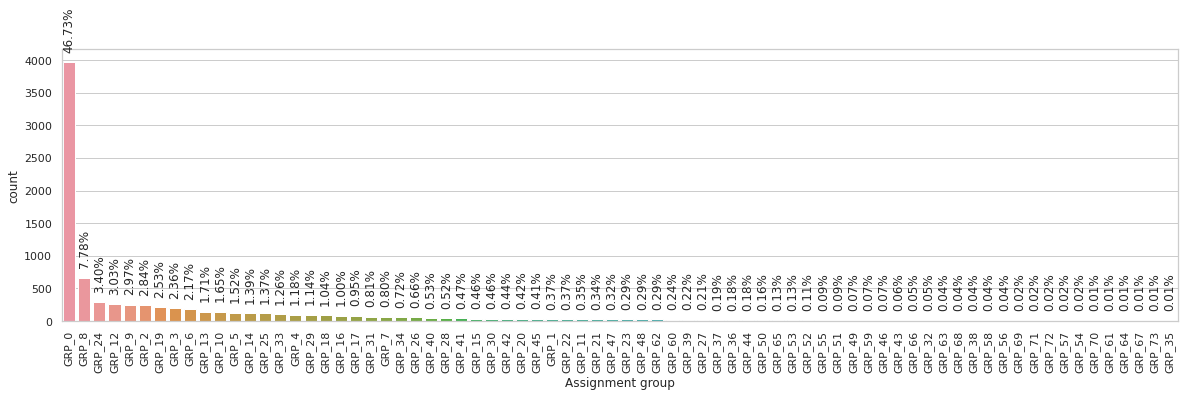

In [ ]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=df_incidents, order=df_incidents["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(df_incidents.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')

**Observation:**

Around three quarters of groups don't even contribute 1% each to the data. This imbalance need to be resolved by detailed data analysis.

##### Lets view the top 20 Assignment groups with highest number of tickets

In [ ]:
df_top_20 = incidents['Assignment group'].value_counts().nlargest(20).reset_index()
df_top_20

,index,Assignment group
0,GRP_0,3968
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252
5,GRP_2,241
6,GRP_19,215
7,GRP_3,200
8,GRP_6,184
9,GRP_13,145


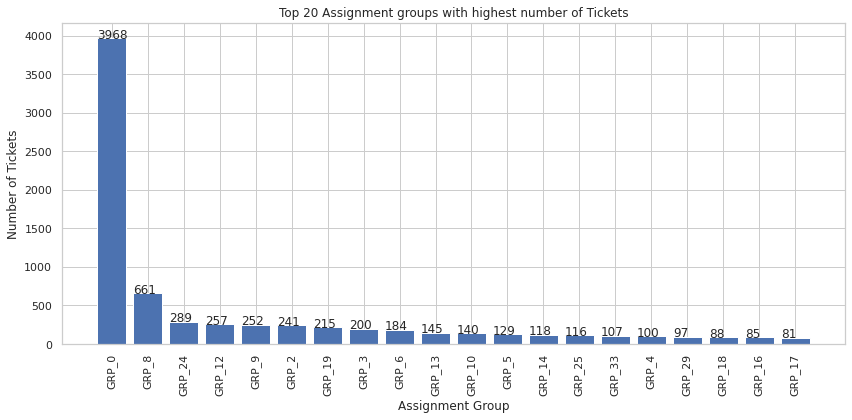

In [ ]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_top_20['index'],df_top_20['Assignment group'])
plt.title('Top 20 Assignment groups with highest number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

##### Lets view the bottom 20 Assignment groups with less number of tickets

In [ ]:
df_bottom_20 = incidents['Assignment group'].value_counts().nsmallest(20).reset_index()
df_bottom_20

,index,Assignment group
0,GRP_70,1
1,GRP_61,1
2,GRP_64,1
3,GRP_67,1
4,GRP_73,1
5,GRP_35,1
6,GRP_69,2
7,GRP_71,2
8,GRP_72,2
9,GRP_57,2


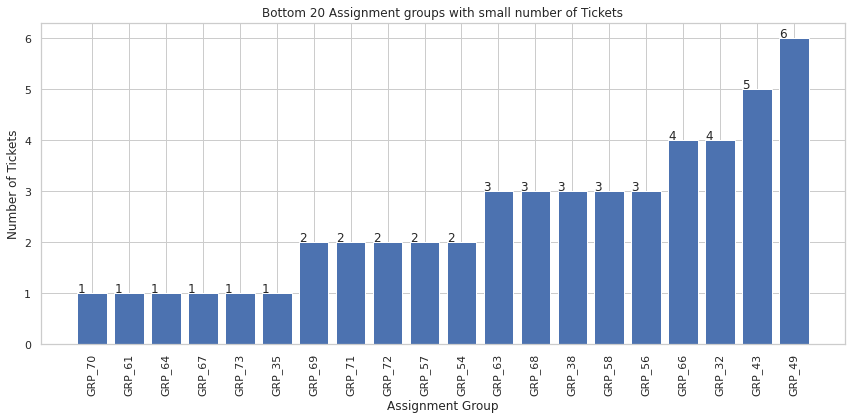

In [ ]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_bottom_20['index'],df_bottom_20['Assignment group'])
plt.title('Bottom 20 Assignment groups with small number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

##### Distribution of tickets based on ticket count

In [ ]:
df_bins = pd.DataFrame(columns=['Description','Ticket Count'])
one_ticket = {'Description':'1 ticket','Ticket Count':len(df_inc[df_inc['Assignment group'] < 2])}
_2_5_ticket = {'Description':'2-5 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 1)& (df_inc['Assignment group'] < 6) ])}
_10_ticket = {'Description':' 6-10 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 5)& (df_inc['Assignment group'] < 11)])}
_10_20_ticket = {'Description':' 11-20 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 10)& (df_inc['Assignment group'] < 21)])}
_20_50_ticket = {'Description':' 21-50 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 20)& (df_inc['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 50)& (df_inc['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 100)])}
#append row to the dataframe
df_bins = df_bins.append([one_ticket,_2_5_ticket,_10_ticket,
                          _10_20_ticket,_20_50_ticket,_51_100_ticket,_100_ticket], ignore_index=True)

df_bins

,Description,Ticket Count
0,1 ticket,6
1,2-5 ticket,13
2,6-10 ticket,6
3,11-20 ticket,9
4,21-50 ticket,16
5,51-100 ticket,9
6,>100 ticket,15


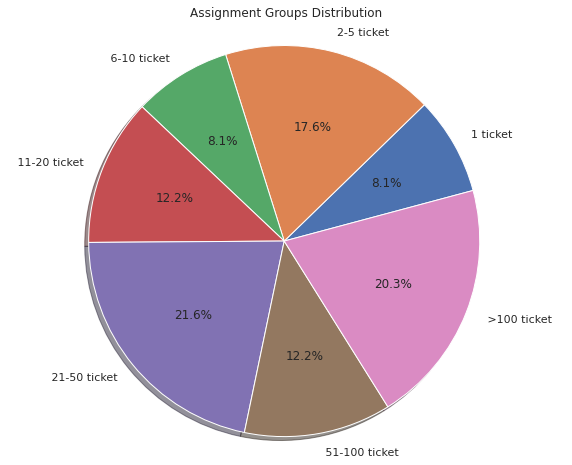

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(df_bins['Ticket Count'],labels=df_bins['Description'],autopct='%1.1f%%', startangle=15, shadow = True);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

**Observation:**
* There are 15 Assignment group’s which have more than 100 tickets.
* Around 20% of the Assignment groups have greater than 100 tickets.

##### Derive insights on ticket distribution by L1/L2 and L3 Queues

In [ ]:
df_incidents_level = incidents.copy()
df_incidents_level['Target'] = np.where(df_incidents_level['Assignment group']=='GRP_0','L1/L2',np.where(df_incidents_level['Assignment group'] =='GRP_8','L1/L2','L3'))

Text(0, 0.5, 'samples')

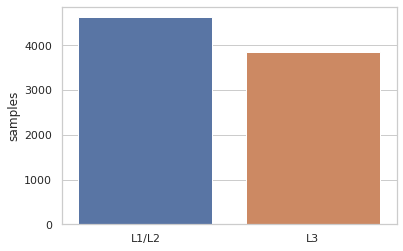

In [ ]:
x=df_incidents_level.Target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

**Observation:**

Given majority records are L1/L2, we assume group 0 and 8 records as L1/L2 tickets and try to observe how they stack up with respect to L3 tickets. L1/L2 records make up more than half of the total data.

Characters in Short description by L1/L2 and L3

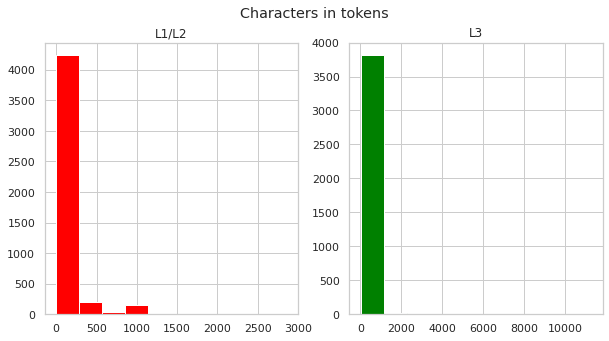

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_incidents_level[df_incidents_level['Target']=='L1/L2']['tokens'].str.len()
ax1.hist(text_len.dropna(),color='red')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Target']=='L3']['tokens'].str.len()
ax2.hist(text_len.dropna(),color='green')
ax2.set_title('L3')
fig.suptitle('Characters in tokens')
plt.show()

Words in Short description by L1/L2 and L3

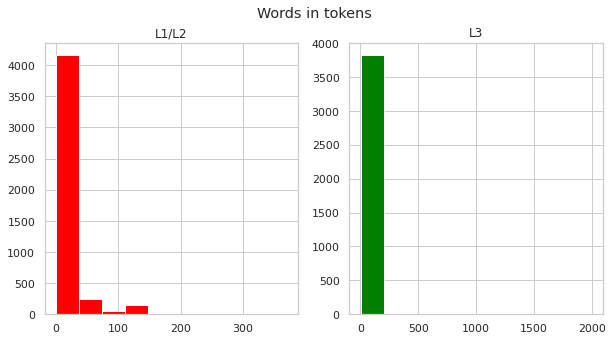

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_incidents_level[df_incidents_level['Target']=='L1/L2']['tokens'].str.split().map(lambda x: len(str(x).split(" ")))
ax1.hist(text_len.dropna(),color='red')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Target']=='L3']['tokens'].str.split().map(lambda x: len(str(x).split(" ")))
ax2.hist(text_len.dropna(),color='green')
ax2.set_title('L3')
fig.suptitle('Words in tokens')
plt.show()

**Observation:**

From the above graphs, we observe how the character and word count stack up for records for different support levels.

##### Take a look at the average (mean) number of words in each ticket, and the longest and shortest description in our data set

In [ ]:
df_incidents['desc_word_cnt'].mean()

26.29395830879755

In [ ]:
print(df_incidents['desc_word_cnt'].max())
print(df_incidents['desc_word_cnt'].min())

1993
0


In [ ]:
len(df_incidents[df_incidents['desc_word_cnt']==0])

1

**Average Word Count**

In [ ]:
def avg_word(sentence):
  words = sentence.split()
  if len(words) > 0:
    avg_cnt = sum(len(word) for word in words)/len(words)
  else:
    avg_cnt = 0
  return (avg_cnt)


df_incidents['avg_word'] = df_incidents['tokens'].apply(lambda x: avg_word(str(x)))
df_incidents.head()

,Description,Caller,Assignment group,tokens,desc_len,desc_word_cnt,avg_word
0,login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,spxjnwir pjlcoqds,GRP_0,login issue verify user detail employee manager name check user name ad reset password advise user login check caller confirm able login issue resolve,150,24,5.291667
1,received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,hmjdrvpb komuaywn,GRP_0,receive hmjdrvpb komuaywn gmail com hello team meeting skype meeting etc appear outlook calendar somebody please advise correct kind,132,19,6.000000
2,cant log in to vpn received from eylqgodm ybqkwiam gmail com hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,log vpn receive eylqgodm ybqkwiam gmail com hi log vpn best,59,11,4.454545
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable access hr_tool page,26,4,5.750000
4,skype error,owlgqjme qhcozdfx,GRP_0,skype error,11,2,5.000000


##### Visualize a distribution of the description word counts to see how skewed our average might be by outliers. 

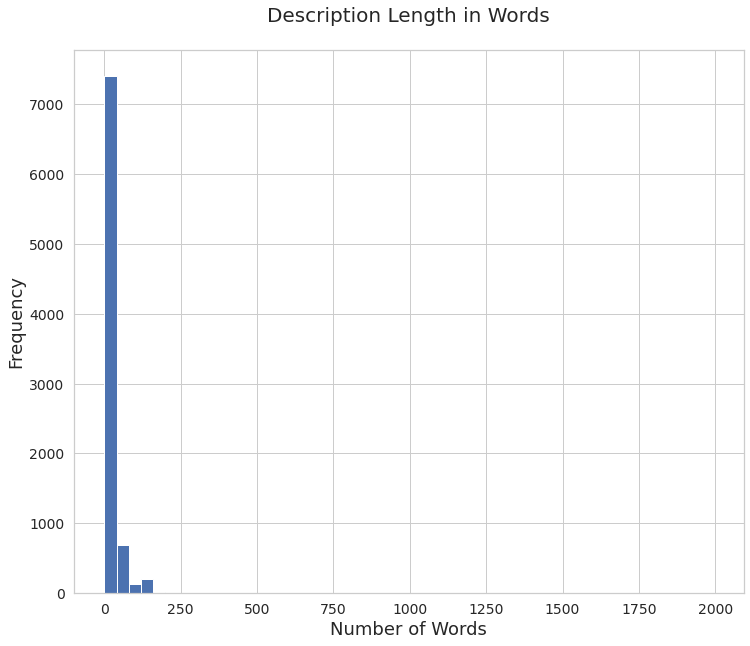

In [ ]:
ax=df_incidents['desc_word_cnt'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Description Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);

**Observation:**

Though most records have length in the lower range, there is significant amount of data with longer sentences.

##### Number of unique words in each article

In [ ]:
df_incidents['uniq_wds'] = df_incidents['tokens'].str.split().apply(lambda x: len(set(x)))
df_incidents['uniq_wds'].head()

0    17
1    18
2     9
3     4
4     2
Name: uniq_wds, dtype: int64

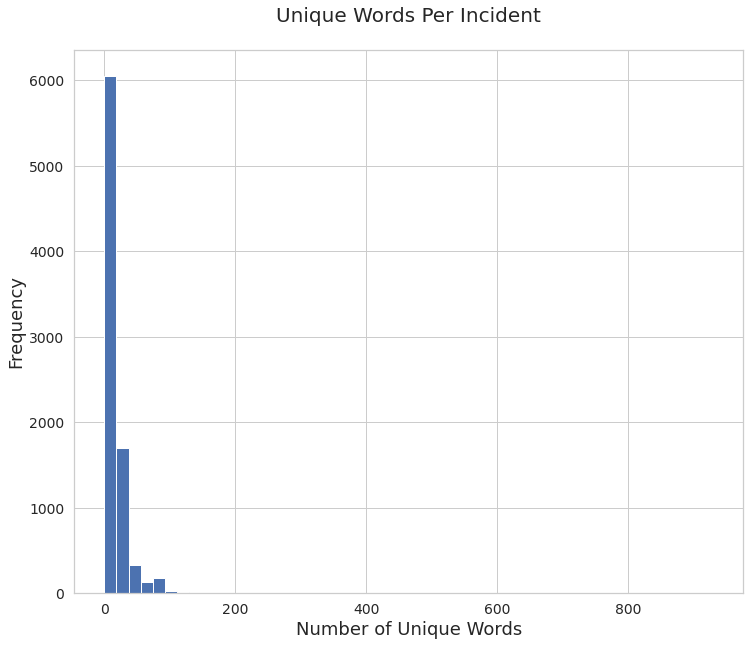

In [ ]:
ax=df_incidents['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Unique Words Per Incident\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18);

When we plot this into a chart, we can see that while the distribution of unique words is still skewed, it looks a bit similar to the distribution based on total word counts we generated earlier.

##### Mean Number of Words in tickets per Assignment Group

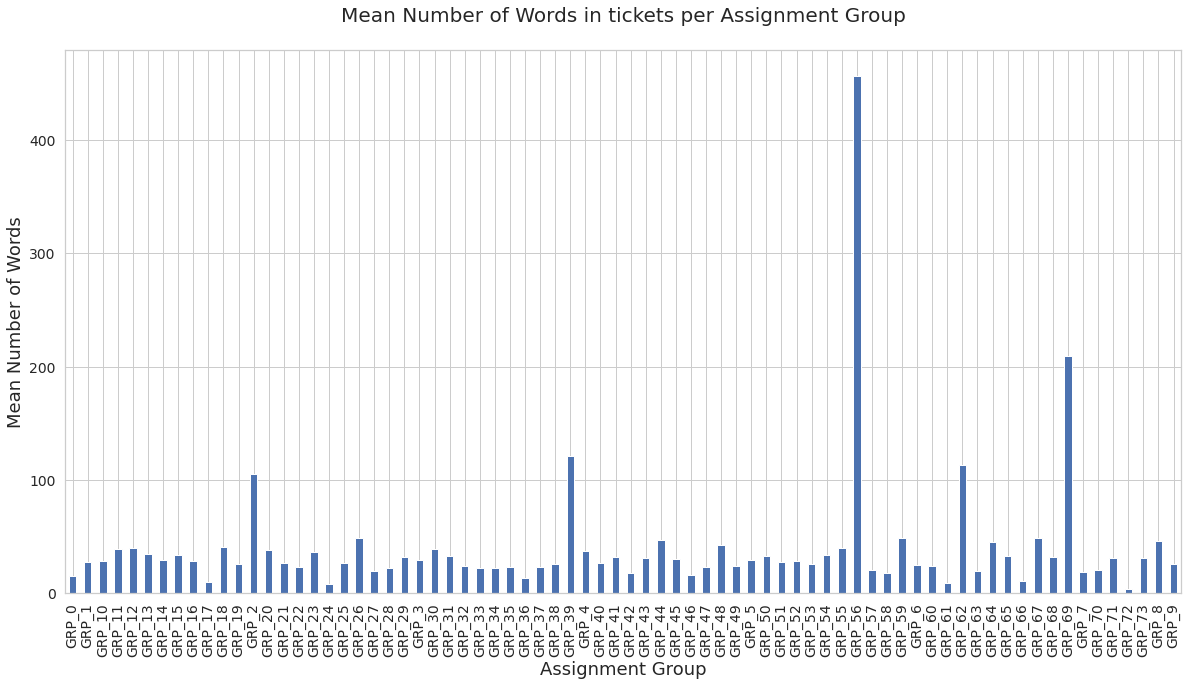

In [ ]:
assign_grps = df_incidents.groupby('Assignment group')
ax=assign_grps['desc_word_cnt'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(20,10))
ax.set_title('Mean Number of Words in tickets per Assignment Group\n', fontsize=20)
ax.set_ylabel('Mean Number of Words', fontsize=18)
ax.set_xlabel('Assignment Group', fontsize=18);

##### Mean Number of Unique Words in tickets per Assignment Group

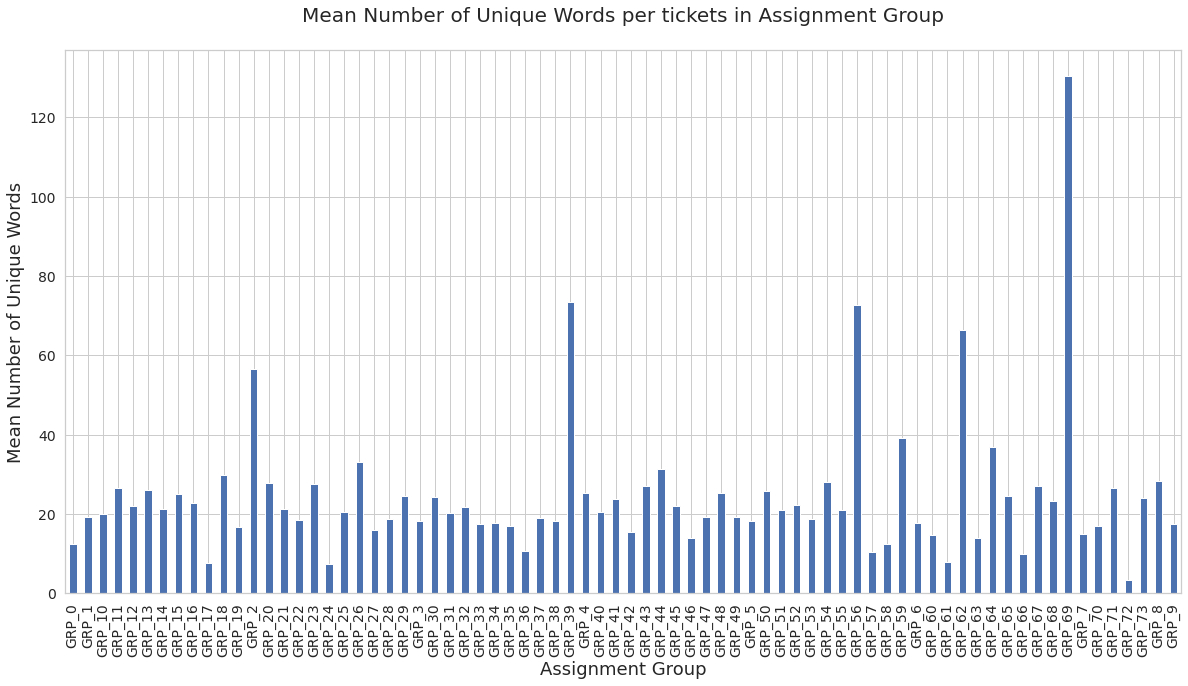

In [ ]:
ax=assign_grps['uniq_wds'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(20,10))
ax.set_title('Mean Number of Unique Words per tickets in Assignment Group\n', fontsize=20)
ax.set_ylabel('Mean Number of Unique Words', fontsize=18)
ax.set_xlabel('Assignment Group', fontsize=18);

##### The most common words over the entire corpus.



In [ ]:
wd_counts = Counter()
for i, row in df_incidents.iterrows():
    wd_counts.update(row['tokens'].split())
    
wd_counts.most_common(20)

[('com', 3691),
 ('company', 2614),
 ('receive', 2520),
 ('00', 2243),
 ('2016', 2206),
 ('please', 2158),
 ('gmail', 2155),
 ('job', 1859),
 ('yes', 1793),
 ('job_scheduler', 1771),
 ('fail', 1742),
 ('password', 1695),
 ('na', 1629),
 ('erp', 1620),
 ('10', 1538),
 ('user', 1519),
 ('access', 1325),
 ('issue', 1297),
 ('reset', 1168),
 ('1', 1092)]

##### WordCloud

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

Also known as tag clouds or text clouds, these are ideal ways to pull out the most pertinent parts of textual data, often also help business users compare and contrast two different pieces of text to find the wording similarities between the two.

Let's write a generic method to generate Word Clouds for both Description column.

In [ ]:
def f_word_cloud(column):
    
    comment_words = ' '
    stopwords = set(STOPWORDS)

    # iterate through the csv file 
    for val in column: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 
    
    return wordcloud

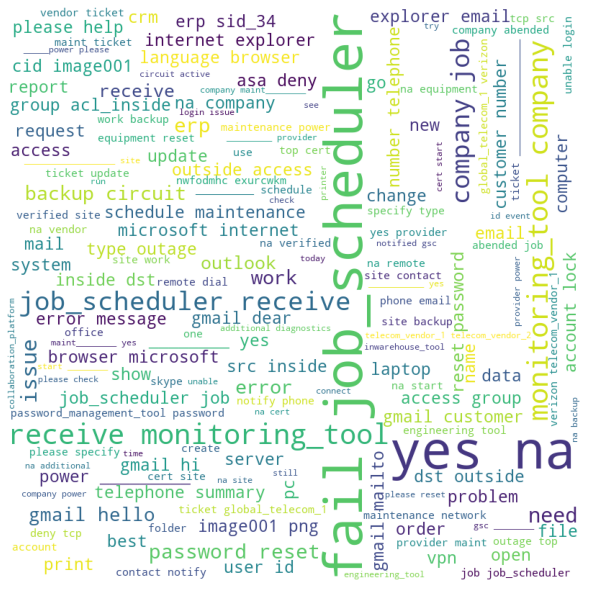

In [ ]:
from wordcloud import WordCloud, STOPWORDS 


wordcloud = f_word_cloud(incidents.tokens)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Word Cloud for tickets with Assignment group 'GRP_0'

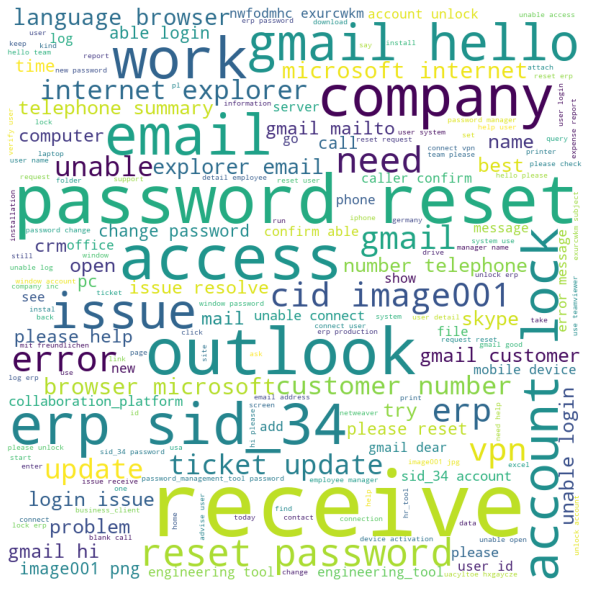

In [ ]:
wordcloud = f_word_cloud(incidents[incidents['Assignment group']=='GRP_0'].tokens)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

**Observation:** 
* Analysis on GRP_0 which is the most frequent group to assign a ticket to reveals that this group deals with mostly the maintenance problems such as password reset, account lock, login issue, connectivity issue, ticket update etc.
* Maximum of the tickets from GRP_0 can be reduced by self correcting itself by putting automation scripts/mechanisms to help resolve these common maintenance issues. This will help in lowering the inflow of service tickets thereby saving the person/hour efforts spend and increasing the business revenue.

Word Cloud for tickets with Assignment group 'GRP_8'

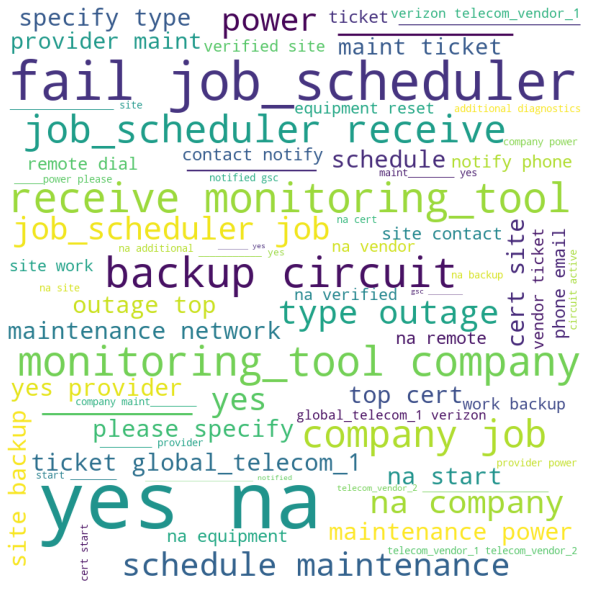

In [ ]:
wordcloud = f_word_cloud(incidents[incidents['Assignment group']=='GRP_8'].tokens)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

**Observation:** GRP_8 seems to have tickets related to outage, job failures, monitoring tool etc

Word Cloud for tickets with Assignment group 'GRP_12'

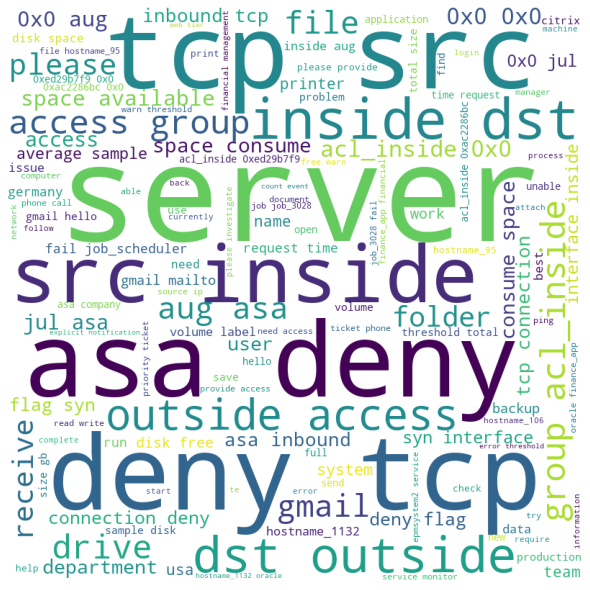

In [ ]:
wordcloud = f_word_cloud(incidents[incidents['Assignment group']=='GRP_12'].tokens)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

**Observation:** GRP_12 contains tickets related to systems like disk space issues, network issues like tie out, citrix issue, connectivity timeout etc.

Word Cloud for tickets with Assignment group 'GRP_24'

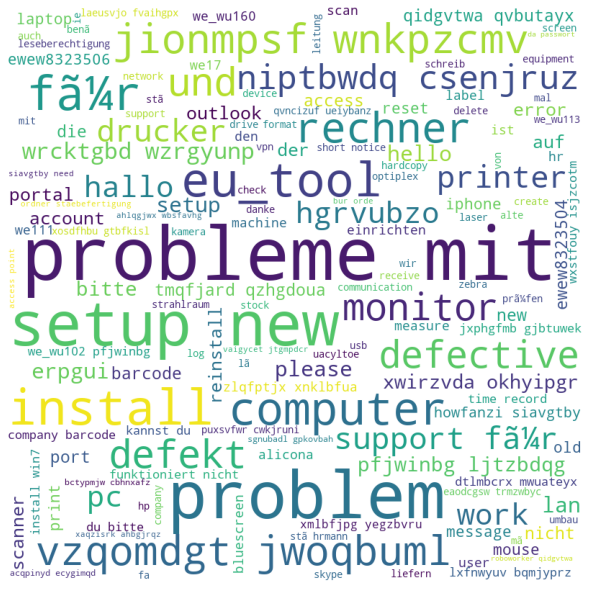

In [ ]:
wordcloud = f_word_cloud(incidents[incidents['Assignment group']=='GRP_24'].tokens)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

**Observation:** GRP_24 - Tickets are mainly in german, these tickets were translated to english before passing it to our model.

#### Measure Readability of a ticket
The readability of a document says about the level of ease of understanding and interpretation .The readability of a text document can be checked using various readability indices like Flesch Reading Ease, Dale Chall Readability Score, and Gunning Fog Index.

For this, we can use the **textstat** library in Python. Textstat is typically used for determining readability, complexity, and grade level of a particular corpus. Each of these indices works on a different methodology for determining the readability level of a document.

In [ ]:
!pip install textstat
import textstat

     |████████████████████████████████| 102kB 4.3MB/s 
     |████████████████████████████████| 3.0MB 8.3MB/s 


In [ ]:

df_incidents['dale_chall_score']=df_incidents['tokens'].apply(lambda x: textstat.dale_chall_readability_score(x))
df_incidents['flesh_reading_ease']=df_incidents['tokens'].apply(lambda x: textstat.flesch_reading_ease(x))
df_incidents['gunning_fog']=df_incidents['tokens'].apply(lambda x: textstat.gunning_fog(x))

print('Dale Chall Score     =>',df_incidents['dale_chall_score'].mean())
print('Flesch Reading Score =>',df_incidents['flesh_reading_ease'].mean())
print('Gunning Fog Index    =>',df_incidents['gunning_fog'].mean())

Dale Chall Score     => 10.18718878812858
Flesch Reading Score => 35.51098221646356
Gunning Fog Index    => 14.556456247791573


**Observation:**
There is very little difference in the Dale Chall Score and the Gunning Fog Index. But there is a considerable amount of variation in the Flesch Reading Score.

Still, we cannot tell the difference in the readability of the two. The textstat library has a solution for this as well. It provides the text_standard() function. that uses various readability checking formulas, combines the result and returns the grade of education required to understand a particular document completel

In [ ]:
df_incidents['text_standard']=df_incidents['tokens'].apply(lambda x: textstat.text_standard(x))

print('Text Standard of Tickets =>',df_incidents['text_standard'].mode())


Text Standard of Tickets => 0    9th and 10th grade
dtype: object


**Observation:** 
The tickets are easily understandable by anyone who has completed the 9th or 10th grade in school.

Let’s take a look at the reading time of tickets. An average adult reads about 250 words per minute. We can also calculate the reading time of a document using the textstat library. It provides the reading_time() function, which takes a piece of text as an argument and returns the reading time for it in seconds.

In [ ]:
df_incidents['reading_time']=df_incidents['tokens'].apply(lambda x: textstat.reading_time(x))

print('Reading Time of =>',df_incidents['reading_time'].mean())


Reading Time of => 2.153185726062892


**Observation:** On looking at the reading time, people usually find longer descriptions helpful (around 400-500 words).

#### Pickling the data post language translation for reuse, further preprocessing to be performed

In [ ]:
with open('incidents_trans.pickle', 'wb') as output:
    pickle.dump(incidents, output)

In [ ]:
with open('incidents_trans.pickle', 'rb') as data:
    incidents = pickle.load(data)

## Topic Modeling
We need to convert our text into numbers or vectors. So following methods are used

### Count Vectorizer
The CountVectorizer method of vectorizing tokens transposes all the words/tokens into features and then provides a count of occurrence of each word. The result is called a document term matrix

In [ ]:
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
tf = tf_vectorizer.fit_transform(incidents['tokens'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

,00,01,02,03,04,05,06,07,08,09,0x0,10,100,11,12,13,14,15,16,17,18,19,20,2013,2016,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,view,vip,visitor,volume,von,vpn,want,warehouse,warm,warn,way,web,website,wednesday,week,welcome,well,wifi,win,window,windows,wireless,within,without,word,work,workflow,would,write,wrong,www,yes,yesterday,µè,ºæ,å¼,æ³,æœ,çš,è½
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8486,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8487,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8488,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8489,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### LDA Topic Modelling
Now that we have prepared our data for topic modeling, we’ll be using the Latent Dirichlet Allocation (LDA) approach to determine the topics present in our corpus. In our model, we are going to produce 10 individual topics (ie. n_components). Once the model is created let’s create a function to display the identified topics. Each topic will consist of 10 words. The function will have three required parameters; the LDA model, feature names from the document term matrix, and the number of words per topic.

In [ ]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=500, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
ticket update printer email name device print summary number group
Topic 1:
00 2016 job job_scheduler fail company com 10 receive monitoring_tool
Topic 2:
yes na site circuit power backup outage company _________ et
Topic 3:
user access id login issue system able source name unable
Topic 4:
event 20 tcp 0x0 29 asa collaboration_platform agent dst src
Topic 5:
com gmail receive please company hello help cid access hi
Topic 6:
password reset user change pc new window request tool password_management_tool
Topic 7:
outlook unable work server connect crm issue skype vpn laptop
Topic 8:
04 deny view call mit page link nicht die hr_tool
Topic 9:
erp account please error message issue get lock order sid_34


Topics produced via LDA are - 
* Topic 0 - Printer 
* Topic 1 - Job Scheduler
* Topic 2 - Power Outage 
* Topic 3 - Login Issues
* Topic 4 - Collaboration
* Topic 5 - Gmail
* Topic 6 - Password Reset
* Topic 7 - Outlook
* Topic 8 - ?
* Topic 9 - ?


In [ ]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1      32.420952   8.115230       1        1  17.406494
9       0.648955  71.707100       2        1  15.482640
5      71.019684   9.971006       3        1  14.843272
2       3.785981  33.185135       4        1  12.282423
0     -42.666500  -9.222070       5        1  10.586988
7      -3.621689 -43.526516       6        1   7.498404
3      -3.632402  -4.171708       7        1   7.023706
4     -36.584400  35.804413       8        1   6.069616
6      44.391380  50.615383       9        1   6.001776
8      40.235809 -31.591665      10        1   2.804681, topic_info=         Term         Freq        Total Category  logprob  loglift
551  password  1659.000000  1659.000000  Default  30.0000  30.0000
187       com  3617.000000  3617.000000  Default  29.0000  29.0000
355     gmail  2110.000000  2110.000000  Default  28.0000  28.0000
820       yes  1831.000000  1831.000000  Default  27.0000  27.0000
0          00  2195.000000  2195.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
800       web    68.522929    79.695835  Topic10  -4.1100   3.4228
450      link   122.039285   182.886475  Topic10  -3.5328   3.1694
167      call   188.646147   457.642472  Topic10  -3.0973   2.6877
669    select    57.391626    95.432179  Topic10  -4.2873   3.0654
409   install    53.095547   156.580556  Topic10  -4.3651   2.4924

[502 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.999396     00
1         1  0.921911     01
1         8  0.075177     01
2         1  0.997049     02
3         1  0.995648     03
...     ...       ...    ...
816       3  0.997390  would
819       3  0.977474    www
820       4  0.999551    yes
825       3  0.981128     æ³
826       3  0.985629     æœ

[643 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 6, 3, 1, 8, 4, 5, 7, 9])

### NMF using TF-IDF 
LDA isn’t the only approach to topic modeling. Let’s try another method named the Non-Negative Matrix Factorization (NMF) approach and see if our topics can be slightly more defined. Instead of using the simple CountVectorizer method to vectorize our words/tokens, we’ll use the TF-IDF (Term Frequency — Inverse Document Frequency) method. The TF-IDF method helps to bring down the weight/impact of high-frequency words.

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df =25, max_features=5000, use_idf=True)
tfidf1 = tfidf_vectorizer.fit_transform(incidents['tokens'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
doc_term_matrix_tfidf = pd.DataFrame(tfidf1.toarray(), columns=list(tfidf_feature_names))
doc_term_matrix_tfidf

,00,01,02,03,04,05,06,07,08,09,0x0,10,100,11,12,13,14,15,16,17,18,19,20,2013,2016,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,view,vip,visitor,volume,von,vpn,want,warehouse,warm,warn,way,web,website,wednesday,week,welcome,well,wifi,win,window,windows,wireless,within,without,word,work,workflow,would,write,wrong,www,yes,yesterday,µè,ºæ,å¼,æ³,æœ,çš,è½
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.627702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.705801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(tfidf1.todense())

8491

In [ ]:
nmf = NMF(n_components=10, random_state=0, alpha=.1, init='nndsvd').fit(tfidf1)
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
00 job_scheduler job fail 2016 monitoring_tool 09 10 company 08
Topic 1:
password reset password_management_tool use request window change user manager please
Topic 2:
gmail com receive please access user hello help cid issue
Topic 3:
account lock window unlock ad lockout sid_34 user get please
Topic 4:
update ticket driver printer call need query user print telephony_software
Topic 5:
yes na site circuit backup power outage _________ cert maintenance
Topic 6:
unable login connect skype vpn log user collaboration_platform open access
Topic 7:
erp sid_34 unlock production user log system issue error sid_1
Topic 8:
email internet explorer browser number customer microsoft telephone summary language
Topic 9:
outlook crm issue open work launch load email freeze respond


Topics produced via NMF are - 
* Topic 0 - Scheduler 
* Topic 1 - Password Reset
* Topic 2 - Gmail
* Topic 3 - Account Lock
* Topic 4 - Printer
* Topic 5 - Power Outage
* Topic 6 - Login Issue
* Topic 7 - User account
* Topic 8 - Browser
* Topic 9 - Outlook

The topics produced via NMF seem to be much more distinct compared to LDA.

Let’s add both the LDA and NMF topics into our dataframe for further analysis. Let’s also remap the integer topics into our subjectively derived topic labels.

In [ ]:
nmf_topic_values = nmf.transform(tfidf1)
df_incidents_level['nmf_topics'] = nmf_topic_values.argmax(axis=1)
lda_topic_values = lda_model.transform(tf)
df_incidents_level['lda_topics'] = lda_topic_values.argmax(axis=1)
lda_remap = {0: 'Printer', 1: 'Job Scheduler', 2: 'Power Outage', 3: 'Login Issues', 
             4: 'Collaboration', 5: 'Gmail', 6: 'Passowrd Reset', 
             7: 'Outlook', 8: 'Unknown1', 9: 'Unknown2'}
df_incidents_level['lda_topics'] = df_incidents_level['lda_topics'].map(lda_remap)
nmf_remap = {0: 'Scheduler', 1: 'Password Reset', 2: 'Gmail', 3: 'Account Lock', 
             4: 'Printer', 5: 'Power Outage', 6: 'Login Issue', 7: 'User Account', 
             8: 'Browser', 9: 'Outlook'}
df_incidents_level['nmf_topics'] = df_incidents_level['nmf_topics'].map(nmf_remap)

##### Plot the top most reasons for raising a ticket

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text major ticklabel objects>)

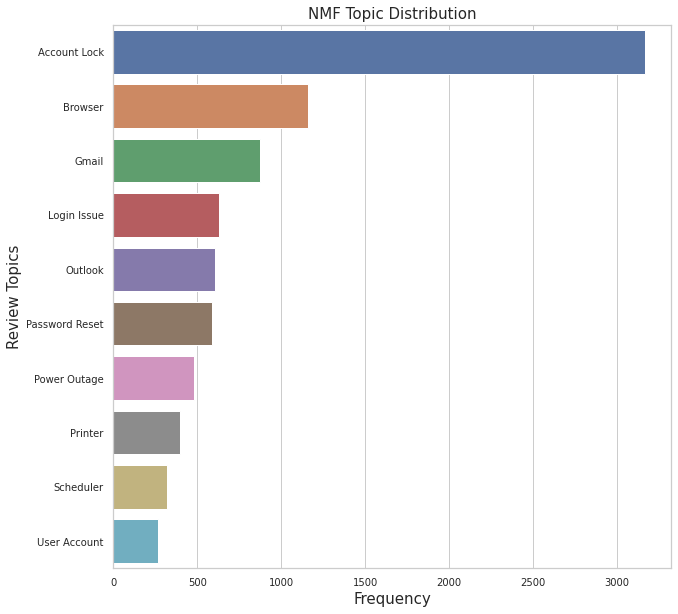

In [ ]:
nmf_x = df_incidents_level['nmf_topics'].value_counts()
nmf_y = nmf_x.sort_index()
plt.figure(figsize=(10,10))
sns.barplot(nmf_x, nmf_y.index)
plt.title("NMF Topic Distribution", fontsize=15)
plt.ylabel('Review Topics', fontsize=15)
plt.yticks(fontsize=10)
plt.xlabel('Frequency', fontsize=15)
plt.xticks(fontsize=10)

#### Try and see if the data could be clustered

In [ ]:
def create_bag_of_words(X):
    vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = 'english', ngram_range = (1,3), max_features = 10000) 
    train_data_features = vectorizer.fit_transform(X)
    train_data_features = train_data_features.toarray()
    
    # tfidf transform
    from sklearn.feature_extraction.text import TfidfTransformer
    tfidf = TfidfTransformer()
    tfidf_features = tfidf.fit_transform(train_data_features).toarray()

    # Get words in the vocabulary
    vocab = vectorizer.get_feature_names()
      
    return vectorizer, vocab, train_data_features, tfidf_features, tfidf

In [ ]:
# word level tf-idf for ticket
vectorizer, vocab, train_data_features, tfidf_features, tfidf  =  create_bag_of_words(incidents['Description'])

In [ ]:
#  create a dictionary mapping the tokens to their tfidf values
bag_dictionary = pd.DataFrame()
bag_dictionary['ngram'] = vocab
bag_dictionary['count'] = train_data_features[0]
bag_dictionary['tfidf_features'] = tfidf_features[0]

# Sort by raw count
bag_dictionary.sort_values(by=['count'], ascending=False, inplace=True)
# Show top 10
print(bag_dictionary.head(10))

                      ngram  count  tfidf_features
9349                   user      3        0.213021
6207                  login      3        0.242982
5437                  issue      2        0.135392
6227            login issue      2        0.223839
2888           check caller      1        0.135250
6209            login check      1        0.135250
6210     login check caller      1        0.135920
2805                 caller      1        0.114620
2806       caller confirmed      1        0.117180
2807  caller confirmed able      1        0.117180


In [ ]:
sorted_by_idf = np.argsort(tfidf.idf_)
feature_names = np.array(vectorizer.get_feature_names())
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:10]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-10:]]))

Features with lowest idf:
['com' 'received' 'company' 'gmail' 'gmail com' 'company com' '2016' 'erp'
 'password' 'job']

Features with highest idf:
['167 92' '5c f0' '167 92 0a' 'lease duration 691200' '168 access'
 '168 access group' '57 68 38' '57 68' '55198 dst' 'bjnqikym']


Below is the 10 tokens with the lowest tfidf score, which is unsurprisingly, very generic words that we could not use to distinguish one description from another.

In [ ]:
bag_dictionary.sort_values(by=['count'], ascending=True).head(10)

,ngram,count,tfidf_features
8319,server offline,0,0.0
31,00001,0,0.0
32,000010,0,0.0
33,000020,0,0.0
34,000020 c316,0,0.0
35,000030,0,0.0
36,000040,0,0.0
20,00 received monitoring_tool,0,0.0
19,00 received,0,0.0
18,00 pm,0,0.0


Below is the 10 tokens with the highest tfidf score, which includes words that are a lot specific that by looking at them, we could guess the categories that they belong to:

In [ ]:
bag_dictionary.sort_values(by=['count'], ascending=False).head(10)

,ngram,count,tfidf_features
9349,user,3,0.213021
6207,login,3,0.242982
5437,issue,2,0.135392
6227,login issue,2,0.223839
7148,password advised,1,0.154661
2899,checked user,1,0.135920
2898,checked,1,0.114620
2004,able login,1,0.109347
2005,able login issue,1,0.119184
6228,login issue resolved,1,0.119184


**TF-IDF Distribution**

In [ ]:

# word level tf-idf for ticket
tfidf3 = TfidfVectorizer(max_features=250, analyzer = 'word', min_df=2, max_df=0.95, ngram_range=(1, 2))
inc_tfidf = tfidf3.fit_transform(incidents['tokens'])

In [ ]:
#  create a dictionary mapping the tokens to their tfidf values
tfidf4 = dict(zip(tfidf3.get_feature_names(), tfidf3.idf_))
tfidf4 = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf4), orient='index')
tfidf4.columns = ['tfidf']

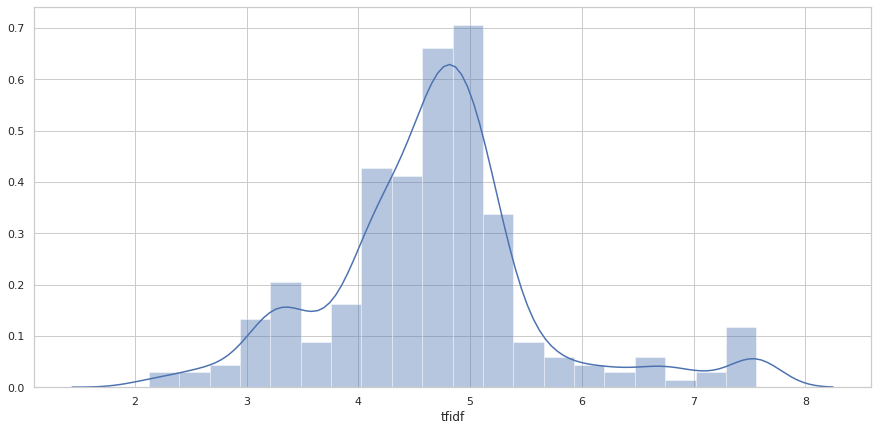

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(tfidf4['tfidf'])

Given the high dimension of our tfidf matrix, we need to reduce their dimension using the Singular Value Decomposition (SVD) technique. And to visualize our vocabulary, we could next use t-SNE to reduce the dimension to 2. t-SNE is more suitable for dimensionality reduction to 2 or 3.

#### Dimensionality Reduction using t-SNE

In [ ]:
n_comp=10
svd = TruncatedSVD(n_components=n_comp, random_state=42)
svd_tfidf = svd.fit_transform(tfidf1)

In [ ]:

tsne_model = TSNE(n_components=2, verbose=1, random_state=42, n_iter=500)
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8491 samples in 0.022s...
[t-SNE] Computed neighbors for 8491 samples in 0.779s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8491
[t-SNE] Computed conditional probabilities for sample 2000 / 8491
[t-SNE] Computed conditional probabilities for sample 3000 / 8491
[t-SNE] Computed conditional probabilities for sample 4000 / 8491
[t-SNE] Computed conditional probabilities for sample 5000 / 8491
[t-SNE] Computed conditional probabilities for sample 6000 / 8491
[t-SNE] Computed conditional probabilities for sample 7000 / 8491
[t-SNE] Computed conditional probabilities for sample 8000 / 8491
[t-SNE] Computed conditional probabilities for sample 8491 / 8491
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.568443
[t-SNE] KL divergence after 500 iterations: 1.193115


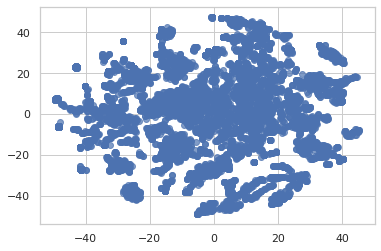

In [ ]:
tfidf_df = pd.DataFrame(tsne_tfidf, columns=['x', 'y'])
plt.scatter(tfidf_df.x, tfidf_df.y, alpha=0.7)

**Observation:**
We can see there are multiple smaller clusters here, each cluster could be the type of tickets that we have in the dataset.

## Agglomerative Clustering


In [ ]:
incidents['Group id'] = incidents['Assignment group'].factorize()[0]
incidents.head()

,Description,Caller,Assignment group,tokens,desc_len,desc_word_cnt,Group id
0,login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,spxjnwir pjlcoqds,GRP_0,login issue verify user detail employee manager name check user name ad reset password advise user login check caller confirm able login issue resolve,150,24,0
1,received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,hmjdrvpb komuaywn,GRP_0,receive hmjdrvpb komuaywn gmail com hello team meeting skype meeting etc appear outlook calendar somebody please advise correct kind,132,19,0
2,cant log in to vpn received from eylqgodm ybqkwiam gmail com hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,log vpn receive eylqgodm ybqkwiam gmail com hi log vpn best,59,11,0
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable access hr_tool page,26,4,0
4,skype error,owlgqjme qhcozdfx,GRP_0,skype error,11,2,0


In [ ]:
group_id_df = incidents[['Assignment group', 'Group id']].drop_duplicates().sort_values('Group id')

In [ ]:
group_to_id = dict(group_id_df.values)
id_to_group = dict(group_id_df[['Group id', 'Assignment group']].values)

### Get Embeddings from Glove

In [ ]:
glove_file = "glove.6B.zip"
#Extract Glove embedding zip file
with ZipFile(glove_file, 'r') as z:
  z.extractall()

In [ ]:
EMBEDDING_FILE = './glove.6B.300d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    embeddings[word] = embd

In [ ]:
def get_sentence_embedding(tokens, vector):
  if len(tokens)<1:
    return np.zeros(300)
  sentvec = [vector[word] if word in vector else np.zeros(300) for word in tokens]
  length = len(sentvec)
  sum = np.sum(sentvec, axis=0)
  avg = np.divide(sum,length)
  return(avg)

sentence_embeddings = np.array(incidents['tokens'].apply(lambda x: get_sentence_embedding(x, embeddings)).values.tolist())

In [ ]:
sentence_embeddings.shape

(8491, 300)

In [ ]:
incidents['embedding'] = incidents['tokens'].apply(lambda x: get_sentence_embedding(x, embeddings))

In [ ]:
incidents.head()

,Description,Caller,Assignment group,tokens,desc_len,desc_word_cnt,Group id,embedding
0,login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,spxjnwir pjlcoqds,GRP_0,login issue verify user detail employee manager name check user name ad reset password advise user login check caller confirm able login issue resolve,150,24,0,"[-0.23115850614073377, 0.0714829761783282, -0.25911256307115155, -0.06319532688707113, -0.4559746023019155, 0.013023035526275635, -0.03543834075331688, 0.17674321550875902, -0.2654873471769194, -1.0088984660307567, 0.07588414440552393, 0.12214321593443553, -0.28548910563190777, 0.03454159085949262, -0.06680162618557613, -0.151536098945265, -0.23822840079665183, 0.32255263787694277, 0.16161527549227078, -0.030371227835615477, -0.06967938873916864, -0.0881408927962184, -0.052514139451086524, 0.09888297364115715, -0.053100081098576384, 0.1482788233583172, 0.1516636462478588, 0.1665243115524451, 0.3094030903776487, -0.33314636644208806, -0.09369005118807157, 0.3538207602997621, -0.20376392154954373, -0.089576582411925, -0.5927372006575267, -0.01685790571073691, 0.26608294414977235, -0.40304173390070597, -0.1359009550853322, 0.14153203875757753, -0.1050553538153569, 0.06059353905419509, -0.445492191084971, 0.5272596708933512, -0.21321381494402886, -0.2342758267869552, 0.18107896526965003, -0.04047222036868334, 0.02454259932041168, 0.036895260711510974, 0.020049781426787375, 0.1863130598391096, -0.05424103649954001, 0.05432762878015637, -0.006543282444278399, 0.23868674659480651, 0.14065840194622675, -0.044800034066041314, 0.0639266337826848, -0.3271083135654529, 0.370672602703174, 0.17820608536402385, 0.11782158260544141, 0.10951698793719213, -0.061144227764258784, -0.05423536290725072, -0.1273551510150234, 0.10907335252384655, 0.23606256738305093, -0.2221488889058431, -0.21553474940359593, 0.293511609484752, 0.1907734611444175, 0.20331871246298155, -0.3584197955826918, -0.06125329925989111, 0.16289389242728552, 0.03886531097193559, -0.0838953656454881, 0.00433394594117999, -0.031222720344861347, 0.13492834533875186, 0.09409250254432361, -0.33483896220723786, 0.16711767909427483, 0.0010864054722090563, -0.09148741244028012, 0.29665295507758854, 0.12969976944848896, -0.08736241081108649, 0.06188723177649081, 0.12693418299158415, -0.2753047099026541, -0.44350893373290695, 0.36766805602237584, 0.024881308873494466, -0.14279205193122227, -0.20683154728263617, 0.18543389247109493, -0.3847712119917075, ...]"
1,received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,hmjdrvpb komuaywn,GRP_0,receive hmjdrvpb komuaywn gmail com hello team meeting skype meeting etc appear outlook calendar somebody please advise correct kind,132,19,0,"[-0.25078766922480566, 0.07879859299370737, -0.21875436784643115, -0.03028838574942766, -0.4743287135480028, 0.048793441079782715, -0.003328410174810525, 0.19704048811091165, -0.28754293106524553, -1.013267652667833, 0.07835651376764431, 0.11987049527692073, -0.274450211298906, 0.046301974548083366, -0.06340068073548151, -0.13437952298078348, -0.2369989398302454, 0.3321818479082801, 0.18808840321038256, -0.02713867508326516, -0.10083538039841435, -0.10768636279372555, -0.021606024044255417, 0.09628564443890796, -0.037819789299233394, 0.14959933284218563, 0.1571987459690056, 0.1896782127406561, 0.28617164732493233, -0.35578642825236206, -0.10124445904159185, 0.355589059830615, -0.17201147240120918, -0.08254824505385125, -0.5834869674660943, -0.008887998787968449, 0.2590223013733824, -0.4116001519741434, -0.16557936184813804, 0.14545522720877532, -0.13987403755273783, 0.06621558956844224, -0.4494891873963008, 0.5494635871639757, -0.250469836067747, -0.24576165936322827, 0.17647791871621105, -0.04373295459839882, 0.06948126870856593

In [ ]:
inc_clus = pd.DataFrame(incidents['Assignment group'].unique(),columns=['Assignment group'])

In [ ]:
for i in incidents['Assignment group'].unique():
  inc_clus.loc[inc_clus['Assignment group']==i,'embedding'] = pd.Series([np.mean(incidents[incidents['Assignment group']==i]['embedding'])],
                                                                        index=inc_clus.loc[inc_clus['Assignment group']==i].index,dtype='object')
  inc_clus.loc[inc_clus['Assignment group']==i,'frequency'] = pd.Series(incidents[incidents['Assignment group']==i].shape[0],
                                                                        index=inc_clus.loc[inc_clus['Assignment group']==i].index,dtype='object')

In [ ]:
#Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
model.fit(inc_clus['embedding'].values.tolist())

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=5)

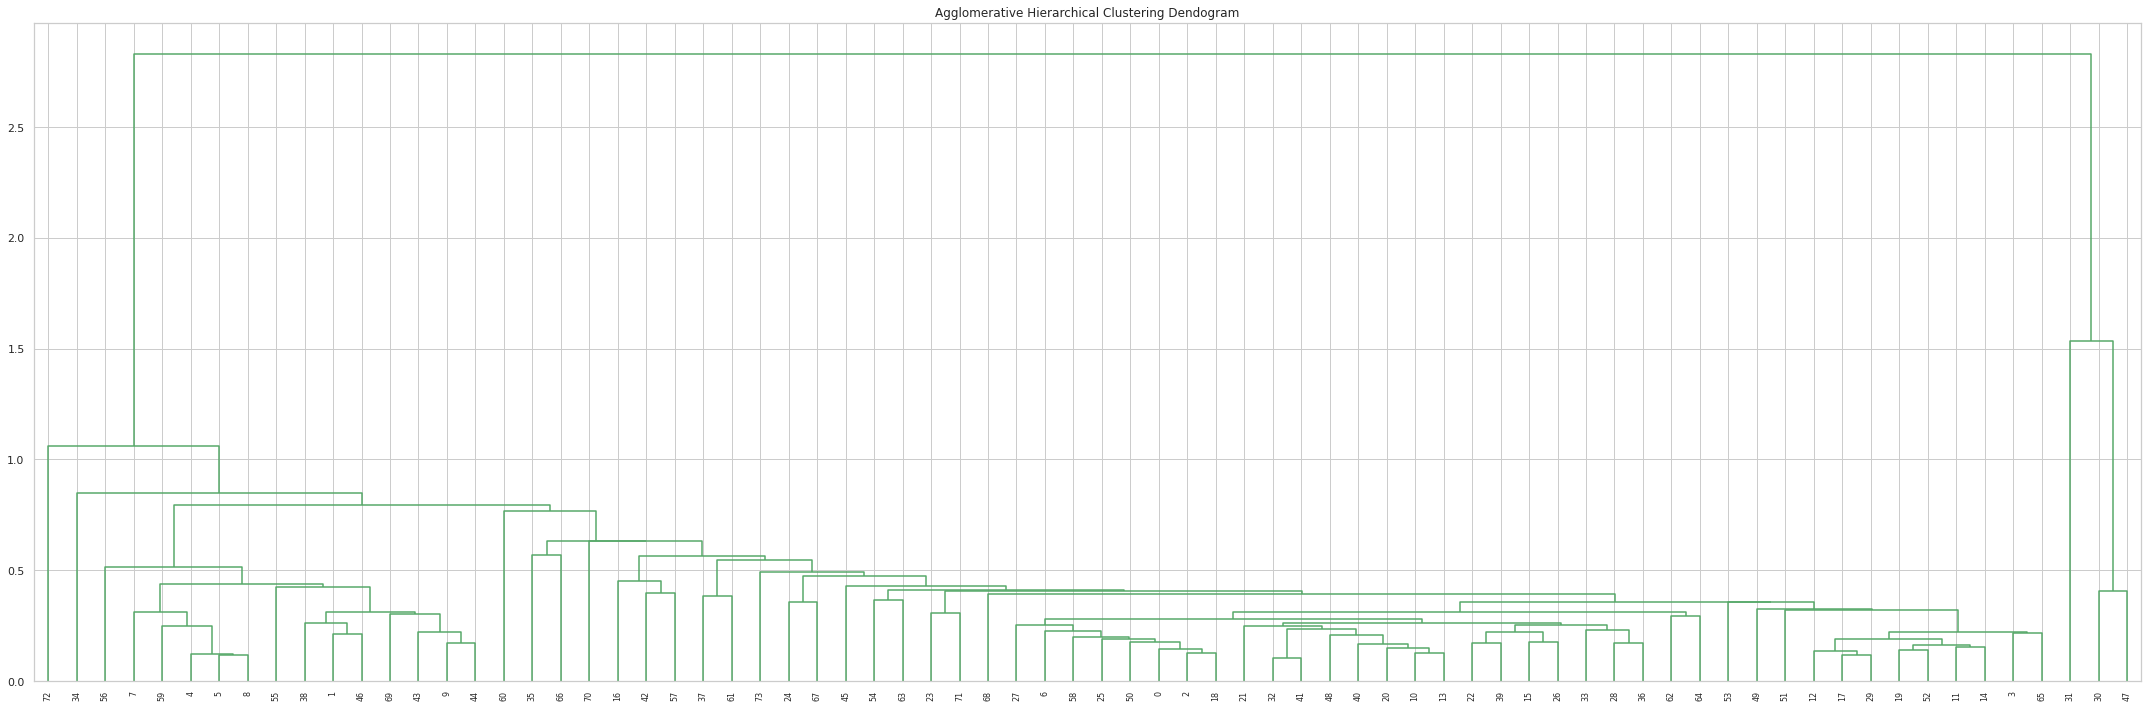

In [ ]:
plt.figure(figsize=(30, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
Z = linkage(inc_clus['embedding'].values.tolist(), metric='euclidean', method='average')
dendrogram(Z, leaf_rotation=90, color_threshold=40, leaf_font_size=8)
plt.tight_layout()

**Observation:**

From the above graph, records for specific groups are largely different from most other groups which seem to be similar. The motive behind performing clustering is to counter the class imbalance in our data. When we choose to form clusters, it needs to satisfy the below condition:
* The clusters must restore some class balance in our data so that our classification model can predict precisely
* The clusters must not be a combination of large number of assignment groups each, if so then we will not be able to infer properly from the classification

Going by this logic, we go with 45 clusters

In [ ]:
model = AgglomerativeClustering(n_clusters=45, affinity='euclidean',  linkage='average')
model.fit(inc_clus['embedding'].values.tolist())

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=45)

In [ ]:
inc_clus['class'] = model.labels_
inc_clus['class'].value_counts()

3     9
1     7
18    5
4     4
0     3
7     3
9     3
8     2
10    2
6     1
5     1
21    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
2     1
19    1
20    1
44    1
43    1
23    1
42    1
41    1
40    1
39    1
38    1
37    1
36    1
35    1
34    1
33    1
32    1
31    1
30    1
29    1
28    1
27    1
26    1
25    1
24    1
22    1
Name: class, dtype: int64

We can see that most of the clusters have only one group each. This is not an ideal scenario since then there are lot of labels to classify.

In [ ]:
for i in incidents['Assignment group'].unique():
  incidents.loc[incidents['Assignment group']==i,'class'] = inc_clus[inc_clus['Assignment group']==i]['class'].values[0]

In [ ]:
clus_arrngmt = pd.DataFrame([(i,inc_clus[inc_clus['class']==i]['Assignment group'].values) for i in inc_clus['class'].unique()],columns=['cluster id','cluster groups'])
clus_arrngmt.set_index('cluster id',inplace=True)
clus_arrngmt['ticket_counts'] = incidents['class'].value_counts()
clus_arrngmt['class_counts'] = inc_clus['class'].value_counts()
clus_arrngmt.reset_index(inplace=True)
clus_arrngmt.head()

In [ ]:
clus_arrngmt.sort_values(by='ticket_counts',ascending=False,inplace=True)
clus_arrngmt=clus_arrngmt[clus_arrngmt['ticket_counts']>100]
clus_arrngmt.sum()

cluster id        112
ticket_counts    7987
class_counts       38
dtype: int64

**Observation:**

We have tried to counter the challenges by filtering those clusters which are associated with at least 100 records. We have arrived at 10 clusters, the class balance has been improved slightly.

In [ ]:
clus_arrngmt

,cluster id,cluster groups,ticket_counts,class_counts
0,1,"[GRP_0, GRP_3, GRP_7, GRP_19, GRP_25, GRP_51, GRP_59]",4581,7
2,3,"[GRP_4, GRP_12, GRP_13, GRP_15, GRP_18, GRP_2, GRP_29, GRP_53, GRP_65]",989,9
4,33,[GRP_8],661,1
3,9,"[GRP_5, GRP_6, GRP_9]",565,3
11,27,[GRP_24],289,1
6,18,"[GRP_11, GRP_14, GRP_20, GRP_41, GRP_49]",230,5
7,4,"[GRP_16, GRP_22, GRP_26, GRP_40]",217,4
5,7,"[GRP_10, GRP_44, GRP_45]",190,3
16,10,"[GRP_33, GRP_42]",144,2
13,0,"[GRP_28, GRP_34, GRP_37]",121,3


In [ ]:
clus_arrngmt['cluster id'].values

array([ 1,  3, 33,  9, 27, 18,  4,  7, 10,  0])

We will only focus on the 38 groups above clustered into 10 classes for proceeding further. Other clusters/classes have very less number of records for our model to understand and predict.

In [ ]:
incidents_clust = incidents[incidents['class'].isin(clus_arrngmt['cluster id'].values)]
incidents_clust.shape

(7987, 9)

### Model Building

Based on the above deductions, we will only focus on the 36 groups above clustered into 8 classes for building various supervised machine learning models. Other clusters/classes have very less number of records for our model to understand and predict.

Let's proceed towards trying different model architectures mentioned below to classify the problem and validate which one is outperforming.

* Multinomial Naive Bayes
* K Nearest neighbor
* Support Vector Machine
* Decision Tree
* Random Forest
* Logistic Regression
* SGD Classifier

Let's write some generic methods for utilities and to plot evaluation metrics.

#### Create training and test datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(incidents_clust['embedding'].values.tolist(), incidents_clust['class'], test_size=0.15, random_state=10)

In [ ]:
  
 #Create a dataframe to capture the accuracy and f1-score of various models   
log_cols=["Classifier", "f1_score"]
log = pd.DataFrame(columns=log_cols)

##### Create a function for various classification models

In [ ]:
# A class that logs the time
class Timer():
    '''
    A generic class to log the time
    '''
    def __init__(self):
        self.start_ts = None
    def start(self):
        self.start_ts = time()
    def stop(self):
        return 'Time taken: %2fs' % (time()-self.start_ts)
    
timer = Timer()

# A method that plots the Precision-Recall curve
def plot_prec_recall_vs_thresh(precisions, recalls, thresholds):
    plt.figure(figsize=(10,5))
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend()

# A method to train and test the model
def run_classification(estimator, X_train, X_test, y_train, y_test, clfname, arch_name=None, pipelineRequired=False, isDeepModel=False):
    global log
    timer.start()
    # train the model
    clf = estimator
    modelname = clfname
   
    if pipelineRequired :
        clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', estimator),
                     ])
      
    if isDeepModel :
        clf.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=128,verbose=1,callbacks=call_backs(arch_name))
        # predict from the classifier
        y_pred = clf.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        y_train_pred = clf.predict(X_train)
        y_train_pred = np.argmax(y_train_pred, axis=1)
    else :
        clf.fit(X_train, y_train)
        # predict from the classifier
        y_pred = clf.predict(X_test)
        y_train_pred = clf.predict(X_train)
    
    print('Estimator:', clf)
    print('='*80)
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('='*80)
    print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
    print('='*80)
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))
    print(timer.stop(), 'to run the model')
    log_entry = pd.DataFrame([[modelname,f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
    log = log.append(log_entry)


### Classification Models on Glove embedding clusters

**Linear SVC**

In [ ]:
run_classification(OneVsRestClassifier(LinearSVC(loss='hinge',random_state=42,class_weight='balanced')), X_train, X_test, y_train, y_test, "LinearSVC")

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Estimator: OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight='balanced',
                                        dual=True, fit_intercept=True,
                                        intercept_scaling=1, loss='hinge',
                                        max_iter=1000, multi_class='ovr',
                                        penalty='l2', random_state=42,
                                        tol=0.0001, verbose=0),
                    n_jobs=None)
Training accuracy: 50.24%
Testing accuracy: 49.96%
Confusion matrix:
 [[  7   6   1   2   3   0   0   1   1   0]
 [ 55 385  39  80  13   5  25  58  17   1]
 [ 15  31  52  18   8   3   3  18   1   2]
 [  1   5   2  13   3   0   0   4   0   0]
 [  3   3   1   3   1   4   1   1   0  12]
 [  2   1   2   4   4  54   1   8   1  11]
 [  1   4   0   0   1   0   6   5   0   0]
 [  3   7  10   2   2   0   1   9   0   1]
 [  6   7   2   2   0   0   4   0  26   0]
 [  1   1  10   1   5  40   0   1   0  46]]
Classification report:
     

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**SGD Classifier**

In [ ]:
run_classification(SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=100, tol=None,class_weight='balanced'), 
                   X_train, X_test, y_train, y_test, "SGDClassifier")

Estimator: SGDClassifier(alpha=0.001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=100, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)
Training accuracy: 55.73%
Testing accuracy: 54.80%
Confusion matrix:
 [[  0  10   3   3   1   0   1   1   2   0]
 [  7 493  16  38   5   7  37  39  32   4]
 [  2  52  12  18   4   7  14  28   5   9]
 [  0  15   1   5   0   0   1   5   1   0]
 [  0   5   2   1   0  14   0   2   2   3]
 [  0   4   3   2   0  68   2   7   2   0]
 [  0   6   1   0   0   0   7   2   1   0]
 [  0  15   2   4   0   2   4   8   0   0]
 [  0   7   1   0   0   0   3   0  36   0]
 [  0   2   1   2   2  67   1   2   0  28]]
Classification report:
               precision    recall  f1-s

**Logistic Regression**

In [ ]:
run_classification(LogisticRegression(n_jobs=1, C=1e5,class_weight='balanced'), X_train, X_test, y_train, y_test, "LogisticRegression")

Estimator: LogisticRegression(C=100000.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Training accuracy: 41.71%
Testing accuracy: 42.04%
Confusion matrix:
 [[  5   4   1   4   3   0   1   0   3   0]
 [ 63 272  42 119  19   5  55  65  32   6]
 [ 11  16  43  25  10   4  12  19   5   6]
 [  2   3   0  16   1   0   1   4   0   1]
 [  2   1   1   3  12   3   2   2   0   3]
 [  2   1   2   4   5  50   0   6   2  16]
 [  1   4   0   0   1   0   8   3   0   0]
 [  2   4   9   2   2   1   2  10   1   2]
 [  5   3   0   1   1   0   4   1  32   0]
 [  1   1   3   0   1  43   0   0   0  56]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.05      0.24      0.09        21
         1.0       0.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Random Forest Classifier**

In [ ]:
run_classification(RandomForestClassifier(max_depth=15, random_state=0, class_weight="balanced"), X_train, X_test, y_train, y_test, "RandomForest")

Estimator: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
Training accuracy: 99.41%
Testing accuracy: 72.14%
Confusion matrix:
 [[  0  18   3   0   0   0   0   0   0   0]
 [  0 643  27   3   0   0   0   1   3   1]
 [  0  91  53   0   0   2   0   0   0   5]
 [  0  21   2   5   0   0   0   0   0   0]
 [  0   8   5   0  12   3   0   0   0   1]
 [  0  17   6   0   0  54   0   0   0  11]
 [  0  15   2   0   0   0   0   0   0   0]
 [  0  21  12   0   0   0   0   1   0   1]
 [  0  23   1   0   0   0  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Decision Tree Classifier**

In [ ]:
run_classification(DecisionTreeClassifier(), X_train, X_test, y_train, y_test, "DecisionTree")

Estimator: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Training accuracy: 99.90%
Testing accuracy: 59.88%
Confusion matrix:
 [[  1  12   2   2   0   0   1   0   1   2]
 [  7 511  70  16   4  13  13  24  14   6]
 [  7  64  42   3   7   6   1   7   4  10]
 [  0  16   4   3   1   0   1   2   0   1]
 [  0   5   4   1  13   4   0   1   0   1]
 [  1  12   9   1   5  51   0   0   0   9]
 [  0   9   2   0   1   1   1   2   1   0]
 [  1  15  11   1   0   2   1   2   1   1]
 [  2  17   2   3   1   2   0   0  20   0]
 [  1   1   9   1   0  16   0   3   0  74]]
Classification report:
               precision    recall  f1

**K-Nearest Neighbours**

In [ ]:
run_classification(KNeighborsClassifier(n_neighbors= 5 , weights = 'distance'), X_train, X_test, y_train, y_test, "KNN")

Estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
Training accuracy: 99.90%
Testing accuracy: 70.73%
Confusion matrix:
 [[  0  13   7   0   1   0   0   0   0   0]
 [  1 614  40   5   1   2   2   7   3   3]
 [  1  83  57   0   1   3   0   2   0   4]
 [  0  15   4   7   0   0   0   1   0   1]
 [  0   7   5   0  13   2   0   0   0   2]
 [  0  11   6   2   2  57   0   0   0  10]
 [  0  11   3   0   1   0   1   1   0   0]
 [  1  15  12   0   0   2   0   4   0   1]
 [  0  21   3   1   0   1   0   0  21   0]
 [  0   1   8   0   0  21   0   1   0  74]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        21
         1.0       0.78      0.91      0.84       678
         3.0       0.39      0.38      0.39       151
         4.0       0.47      0.25      0.33        28
     

In [ ]:
log.set_index(["Classifier"],inplace=True)
log.sort_values(by=['f1_score'])

,f1_score
Classifier,
LogisticRegression,0.358976
LinearSVC,0.443125
SGDClassifier,0.544402
DecisionTree,0.595191
KNN,0.731074
RandomForest,0.761101


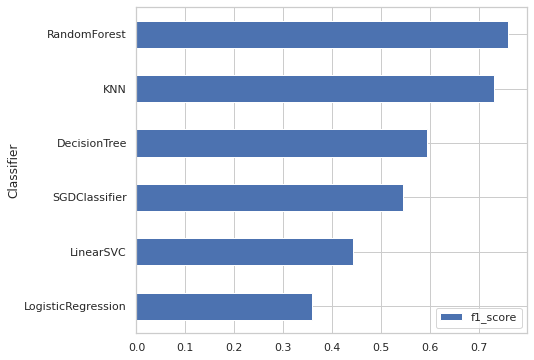

In [ ]:
log.sort_values(by=['f1_score']).plot(kind='barh',figsize=[7,6])

**Observation:** 
* Random Forest and KNN have better performance but still are overfitted since the training accuracy is around 90% for most of the models and the f1-scores are plotted above 
* We would be fine tuning the models and reduce the overfitting in next iteration.
* The performance can be further improved by collecting more data for tickets and by running deep learning models like RNN and LSTM's.

### Classification Models on Bag of Words

In [ ]:
vectorizer, vocab, train_data_features, tfidf_features, tfidf  =  create_bag_of_words(incidents_clust['Description'])

In [ ]:
X = tfidf_features
y = incidents_clust['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

**Multinomial Naive Bayes**

In [ ]:
run_classification(MultinomialNB(), X_train, X_test, y_train, y_test,"MultinomialNB-BOW")

Estimator: MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Training accuracy: 77.46%
Testing accuracy: 73.34%
Confusion matrix:
 [[  0  24   0   0   0   0   0   0   2   1]
 [  0 898   4   0   0   0   0   0   0   0]
 [  0 111  70   0   0   4   0   0   2  14]
 [  0  45   0   0   0   0   0   0   0   0]
 [  0  25   6   0   0   2   0   0   0   8]
 [  0  23  10   0   0  72   0   0   0   9]
 [  0  21   0   0   0   0   2   0   2   0]
 [  0  38   4   0   0   0   0   2   0   1]
 [  0  21   2   0   0   0   2   0  32   0]
 [  0  12   4   0   0  28   0   1   0  96]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        27
         1.0       0.74      1.00      0.85       902
         3.0       0.70      0.35      0.47       201
         4.0       0.00      0.00      0.00        45
         7.0       0.00      0.00      0.00        41
         9.0       0.68      0.63      0.65       114
        10.0       0.50   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Linear SVC**

In [ ]:
run_classification(OneVsRestClassifier(LinearSVC(loss='hinge',random_state=42,class_weight='balanced')), X_train, X_test, y_train, y_test, "LinearSVC-BOW")

Estimator: OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight='balanced',
                                        dual=True, fit_intercept=True,
                                        intercept_scaling=1, loss='hinge',
                                        max_iter=1000, multi_class='ovr',
                                        penalty='l2', random_state=42,
                                        tol=0.0001, verbose=0),
                    n_jobs=None)
Training accuracy: 95.18%
Testing accuracy: 77.85%
Confusion matrix:
 [[  7  13   1   0   0   0   0   0   5   1]
 [  7 807  45  18   0   4   5  12   3   1]
 [  1  39 128   6   2   5   3   2   1  14]
 [  0  17   4  24   0   0   0   0   0   0]
 [  0   8   9   0  20   1   0   1   0   2]
 [  0   8   6   3   0  76   2   2   0  17]
 [  0  16   0   0   0   0   7   0   2   0]
 [  0  10  12   0   1   1   0  19   1   1]
 [  1   4   2   0   0   0   5   0  45   0]
 [  0   2   6   0   3  16   0   3   0 111]]
Classification report:
     

**SGD Classifier**

In [ ]:
run_classification(SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=100, tol=None,class_weight='balanced'), 
                   X_train, X_test, y_train, y_test, "SGDClassifier-BOW")

Estimator: SGDClassifier(alpha=0.001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=100, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)
Training accuracy: 83.28%
Testing accuracy: 70.71%
Confusion matrix:
 [[ 10   6   0   0   1   0   5   0   4   1]
 [ 45 712  14  47   8   5  29  20  19   3]
 [ 11  40  79  11  13   7   9  11   4  16]
 [  3   7   2  32   1   0   0   0   0   0]
 [  1   1   1   3  29   1   1   2   0   2]
 [  0   6   2   4   0  86   3   8   0   5]
 [  2   6   0   0   0   0  12   0   5   0]
 [  1   6   5   0   2   0   0  29   1   1]
 [  1   1   0   0   0   0   7   0  48   0]
 [  1   1   2   1   3  36   0   4   0  93]]
Classification report:
               precision    recall  f1-s

**Logistic Regression**

In [ ]:
run_classification(LogisticRegression(n_jobs=1, C=1e5,class_weight='balanced'), X_train, X_test, y_train, y_test, "LogisticRegression-BOW")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Estimator: LogisticRegression(C=100000.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Training accuracy: 99.06%
Testing accuracy: 76.22%
Confusion matrix:
 [[  9  14   1   0   0   0   0   0   2   1]
 [ 14 817  42   9   0   3   3  11   2   1]
 [  0  57 116   1   5   7   2   0   1  12]
 [  0  29   3  13   0   0   0   0   0   0]
 [  0  18   5   0  15   1   0   1   0   1]
 [  0  14   2   2   0  79   0   1   0  16]
 [  0  18   1   0   0   0   5   0   1   0]
 [  0  12  12   0   2   0   0  18   1   0]
 [  3   8   2   0   0   0   6   0  38   0]
 [  0   3   6   0   3  18   0   3   0 108]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.35      0.33      0.34        27
         1.0       0.

**Random Forest Classifier**

In [ ]:
le = LabelEncoder()
tokenizer = Tokenizer(num_words= 10000)
tokenizer.fit_on_texts(incidents_clust['Description'])
maxlen = 300

In [ ]:
X_M1 = tokenizer.texts_to_sequences(incidents_clust['Description'])
X_M1 = pad_sequences(X_M1, maxlen = maxlen)
y_M1 = np.asarray(incidents_clust['class'])

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_M1, y_M1, test_size = 0.3)

In [ ]:
run_classification(RandomForestClassifier(max_depth=15, random_state=0, class_weight="balanced"), X_train_2, X_test_2, y_train_2, y_test_2, "RandomForest-BOW")

Estimator: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
Training accuracy: 99.11%
Testing accuracy: 69.88%
Confusion matrix:
 [[   0   31    3    0    0    0    0    0    1    0]
 [   0 1287   72    0    0    0    0    0    7    0]
 [   0  213   69    0    0    2    1    0    4    9]
 [   0   62    9    0    0    0    0    0    0    0]
 [   0   40    6    0   18    3    0    0    0    2]
 [   0   33    7    0    0  120    0    0    0   22]
 [   0   26    4    0    0    0    4    0    4    0]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Decision Tree Classifier**

In [ ]:
run_classification(DecisionTreeClassifier(), X_train_2, X_test_2, y_train_2, y_test_2, "DecisionTree-BOW")

Estimator: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Training accuracy: 99.91%
Testing accuracy: 59.20%
Confusion matrix:
 [[   1   20    5    0    1    2    0    2    3    1]
 [  29 1013  146   49   11   29   17   28   26   18]
 [   5  125   94   16    7   10    6   13    5   17]
 [   2   34   16    3    5    6    1    3    0    1]
 [   2   27    6    2   19    7    1    3    0    2]
 [   2   17   11    1    4  100    3    4    1   39]
 [   2   15    5    1    0    0    4    2    8    1]
 [   4   29   20    4    1    1    1    4    0    2]
 [   0   16    5    0    0    0    1    0   72    1]
 [   0   21   1

**K-Nearest Neighbours**

In [ ]:
run_classification(KNeighborsClassifier(n_neighbors= 5 , weights = 'distance'), X_train_2, X_test_2, y_train_2, y_test_2, "KNN-BOW")

Estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
Training accuracy: 99.91%
Testing accuracy: 66.46%
Confusion matrix:
 [[   1   29    1    0    0    0    0    0    2    2]
 [   1 1241   57    8    0   10    5    9   15   20]
 [   0  194   64    2    0    6    2    6    6   18]
 [   0   56    8    0    0    3    0    3    0    1]
 [   0   38    5    0   18    1    0    1    0    6]
 [   0   35    9    0    1   95    1    2    0   39]
 [   0   25    6    0    0    0    0    1    5    1]
 [   0   55    4    1    0    2    0    1    1    2]
 [   1   24    0    0    0    0    1    1   67    1]
 [   0   28    5    0    1   36    0    1    0  106]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.33      0.03      0.05        35
         1.0       0.72      0.91      0.80      1366
         3.0 

In [ ]:
log.set_index(["Classifier"],inplace=True)
log.sort_values(by=['f1_score'])

,f1_score
Classifier,
NaN,0.358976
NaN,0.443125
NaN,0.544402
DecisionTree-BOW,0.589321
NaN,0.595191
SGDClassifier-BOW,0.687461
KNN-BOW,0.710885
NaN,0.731074
RandomForest-BOW,0.750038


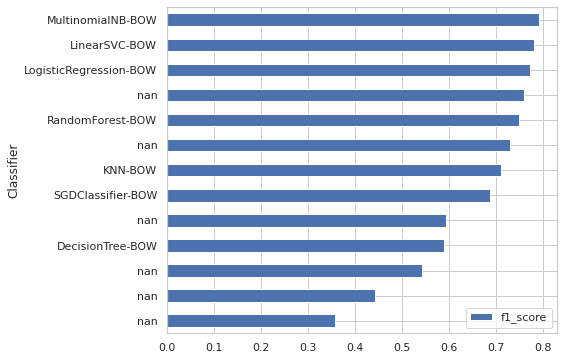

In [ ]:
log.sort_values(by=['f1_score']).plot(kind='barh',figsize=[7,6])

**Observation:** 
* Multinomial NB and Linear SVC have better performance but still are overfitted since the training accuracy is around 90% for most of the models and the testing accuracies, f1-scores are plotted above 
* We would be fine tuning the models and reduce the overfitting in next iteration.
* The performance can be further improved by collecting more data for tickets and by running deep learning models like RNN and LSTM's.

## **Final Conclusions**
We first analysed the dataset provided to us, undestood the structure of the data provided - number of columns, field , datatypes etc.

> We first analysed the dataset provided to us, undestood the structure of the data provided - number of columns, field , datatypes etc.

> We did Exploratory Data Analysis to derive further insights from this data set and we found that
*   Data is very much imbalanced, there are around ~45% of the Groups with less than 20 tickets.
*   Few of the tickets are in foreign language like German
*   The data has lot of noise in it, for eg- few tickets related to account setup are spread across multiple assignment groups.

> We performed the data cleaning and preprocessing
*   Translation: A small number of tickets were written in German. Hence, we used the Google translate to convert German to English to generate the input data for the next steps. 
*   Make text all lowercase so that the algorithm does not treat the same words in different cases as different
*   Removing Noise i.e everything that isn’t in a standard number or letter i.e Punctuation, Numerical values
*   Removing extra spaces
*   Removed punctuations
*   Removed words containing numbers
*   Stopword Removal: Sometimes, some extremely common words which would appear to be of little value in helping select documents matching a user need are excluded from the vocabulary entirely. These words are called stop words
*   Lemmatization
*   Tokenization: Tokenization is just the term used to describe the process of converting the normal text strings into a list of tokens i.e words that we actually want. Sentence tokenizer can be used to find the list of sentences and Word tokenizer can be used to find the list of words in strings.

> We then performed topic modeling using LDA and NMF methods.

> Dimensionality reduction by T-sNE was performed.

> Clustering using hierarchical agglomerative clustering was performed to arrive at the different clusters and pseudo group of the assignment groups.

> We then ran a basic benchmarck model using the cleaned and preprocessed dataset. We focused only on the 38 groups above clustered into 10 classes for building various supervised machine learning models. Other clusters/classes have very less number of records for our model to understand and predict.
We trained the data using below models:
*   Multinomial NB
*   Linear Support vector Machine
*   SGD Classifier
*   Random Forest
*   Decision Tree
*   Logistic regression
*   Xgboost

LinearSVC gives better performance with accuracy 0.833642 f1 score 0.818053

Although, it seems like the call is biased towards GRP_0 which has a majority of samples.

Even after downsampling the data we see that the predictions are biased towards GRP_0 which has a majority of samples.
Imbalance causes two problems:
Training is inefficient as most samples are easy examples that contribute no useful learning signal;
The easy examples can overwhelm training and lead to degenerate models. A common solution is to perform some form of hard negative mining that samples hard examples during training or more complex sampling/re weighing schemes.In order to handle the imbalance problem we used class_weight=balanced hyperparameter while training the model, which tells the model to "pay more attention" to samples from an under-represented class.
Although, the accuracy and f1_score went down. This ensured that the classes were being correctly classified with lesser number of missclassification and good precision/recall scores for all the classes

## **Next Steps**

We could further improve the model by
*   Exploring more features out of the dataset
hyperparameter tuning using GridsearchCV,
*   try transfer learning with word embeddings and use that as a feature for modelling.
*   use neural network architecture like RNN or LSTM to improve model performance.
*   The performance can be further improved by collecting more data for tickets and by running deep learning models like RNN and LSTM's.